In [1]:
%%html
<link rel="stylesheet" type="text/css" href="./rise.css" />

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

# Clustering

- k-means
- Silhouette Score
- Mean-shift
- Gaussian Mixture Model (GMM)
- Bayesian Information Criterion (BIC)
- Heirarchical Agglomerative Clustering (HAC)
- Density-Based Spatial Clustering (DBSCAN)

### Learning goals - *Clustering*

|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will appreciate that each clustering algorithm has its own pros and cons.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand and be able to use several different clustering algorithms to segregate data.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use several different empirical metrics to tune your model hyperparameters.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use the empirical Bayesian Information Criterion to decide the optimal number of clusters for a Gaussian Mixture Model.</div> |  |

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

https://www.kaggle.com/ruslankl/mice-protein-expression

In [3]:
import pandas as pd
df = pd.read_csv('data/Data_Cortex_Nuclear.csv')
df

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

Goal is to use protein expression levels to classify mice. Each mouse in the dataset belongs to one of the following eight classes:

1. c-CS-s: control mice,  stimulated to learn,      injected with saline
2. c-CS-m: control mice,  stimulated to learn,      injected with memantine
3. c-SC-s: control mice,  not stimulated to learn,  injected with saline
4. c-SC-m: control mice,  not stimulated to learn,  injected with memantine
5. t-CS-s: trisomy mice,  stimulated to learn,      injected with saline
6. t-CS-m: trisomy mice,  stimulated to learn,      injected with memantine
7. t-SC-s: trisomy mice,  not stimulated to learn,  injected with saline
8. t-SC-m: trisomy mice,  not stimulated to learn,  injected with memantine

which are combinations of:

* Control vs. down syndrome.
* Did or did not recieve behavioral conditioning.
* Saline vs. memantine injection.

First, throw out features and data points with missing measurements.

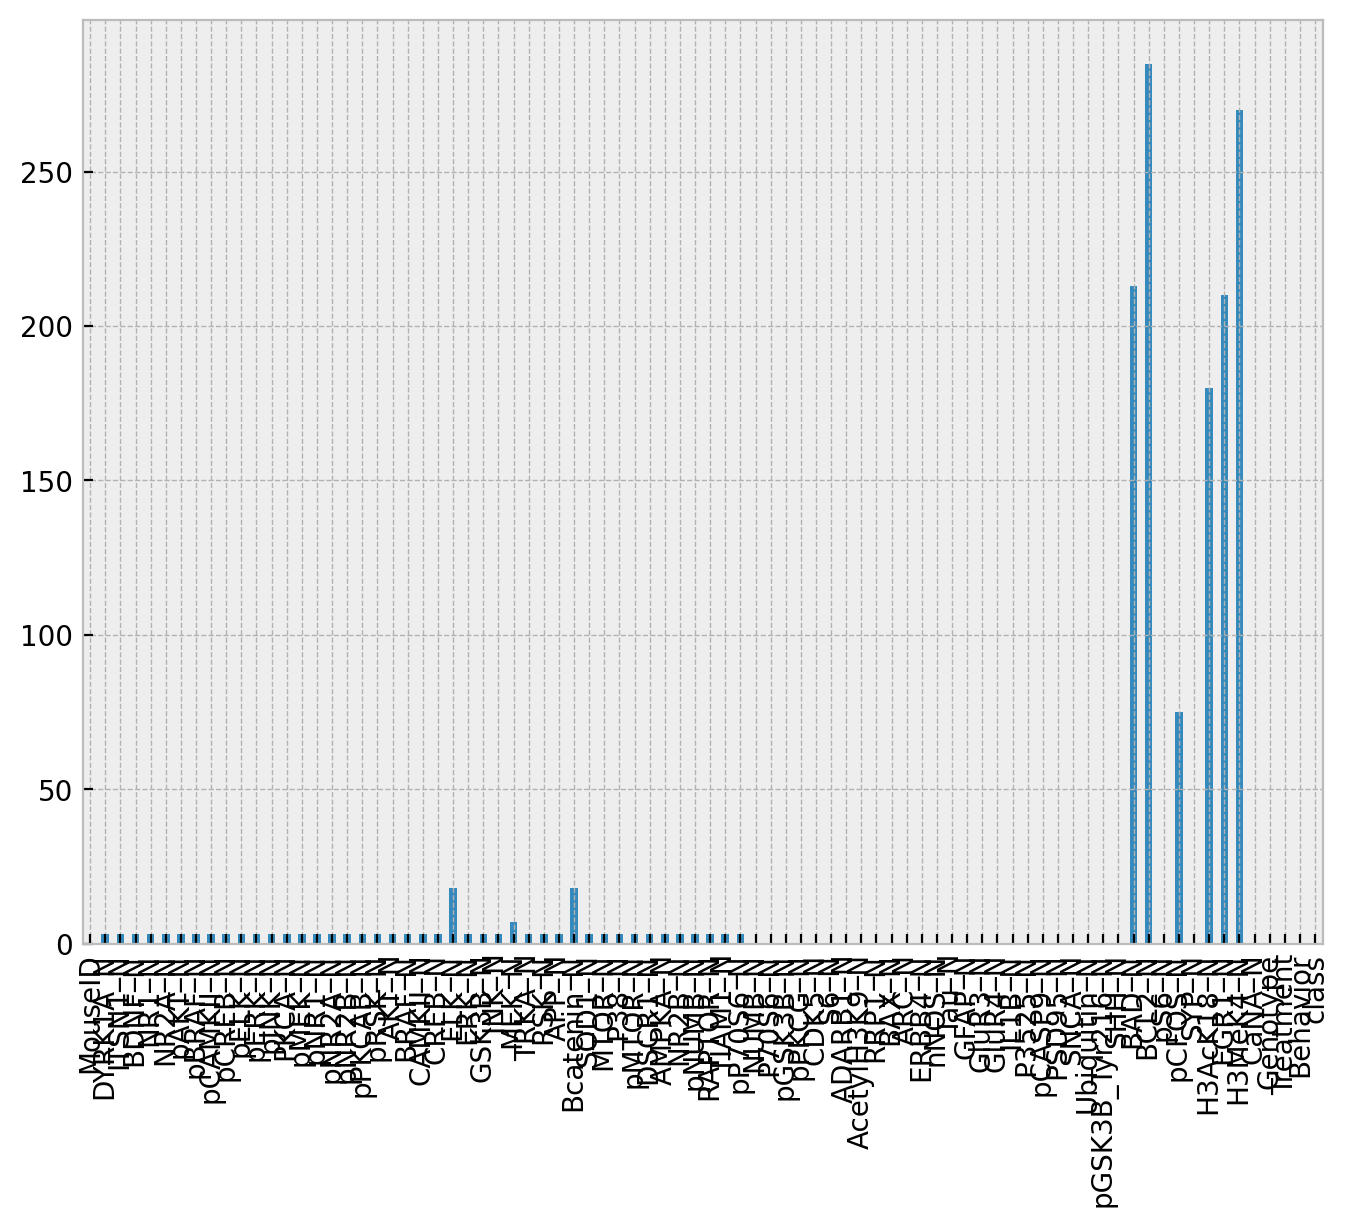

In [4]:
df.isnull().sum().plot.bar();

In [5]:
miss_too_many = df.isnull().sum() > 10

miss_too_many

MouseID      False
DYRK1A_N     False
ITSN1_N      False
BDNF_N       False
NR1_N        False
             ...  
CaNA_N       False
Genotype     False
Treatment    False
Behavior     False
class        False
Length: 82, dtype: bool

In [6]:
df2 = df.loc[:, ~miss_too_many]

df.shape, df2.shape

((1080, 82), (1080, 74))

In [7]:
# discard mice with missing measurements
df2 = df2.dropna()

df2.shape

(1073, 74)

The dataset we will use for building a classsification model.

In [8]:
df2

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...  Ubiquitin_N  pGSK3B_Tyr216_N  \
0     0.177565   2.373744  0.232224  ...     1.044979         0.831557   
1     0.172817   2.292150  0.226972  ...     1.009883         0.849270   
2     0.175722   2.283337  0.230247  ...     0.996848         0.846709   
3     0.176463   2.152301  0.207004  ...     0.990225         0.833277   
4     0.173627   2.134014  0.192158  ...     0.997775         0.878668   
...        ...        ...       ...  ...          ...              ...   
1075  0.171262   2.483740  0.207317  ...     1.261651         0.962942   
1076  0.182496   2.512737  0.216339  ...     1.254872         0.983690   
1077  0.161435   1.989723  0.185164  ...     1.242248         0.976609   
1078  0.173623   2.086028  0.192044  ...     1.301071         0.989286   
1079  0.191811   2.361816  0.223632  ...     1.267120         1.020383   

         SHH_N     pS6_N     SYP_N    CaNA_N  Genotype  Treatment  Behavior  \
0     0.188852  0.106305  0.427099  1.675652   Control  Memantine       C/S   
1     0.200404  0.106592  0.441581  1.743610   Control  Memantine       C/S   
2     0.193685  0.108303  0.435777  1.926427   Control  Memantine       C/S   
3     0.192112  0.103184  0.391691  1.700563   Control  Memantine       C/S   
4     0.205604  0.104784  0.434154  1.839730   Control  Memantine       C/S   
...        ...       ...       ...       ...       ...        ...       ...   
1075  0.275547  0.115806  0.374088  1.364823    Ts65Dn     Saline       S/C   
1076  0.283207  0.113614  0.375259  1.364478    Ts65Dn     Saline       S/C   
1077  0.290843  0.118948  0.422121  1.430825    Ts65Dn     Saline       S/C   
1078  0.306701  0.125295  0.397676  1.404031    Ts65Dn     Saline       S/C   
1079  0.292330  0.118899  0.420347  1.370999    Ts65Dn     Saline       S/C   

       class  
0     c-CS-m  
1     c-CS-m  
2     c-CS-m  
3     c-CS-m  
4     c-CS-m  
...      ...  
1075  t-SC-s  
1076  t-SC-s  
1077  t-SC-s  
1078  t-SC-s  
1079  t-SC-s  

[1073 rows x 74 columns]

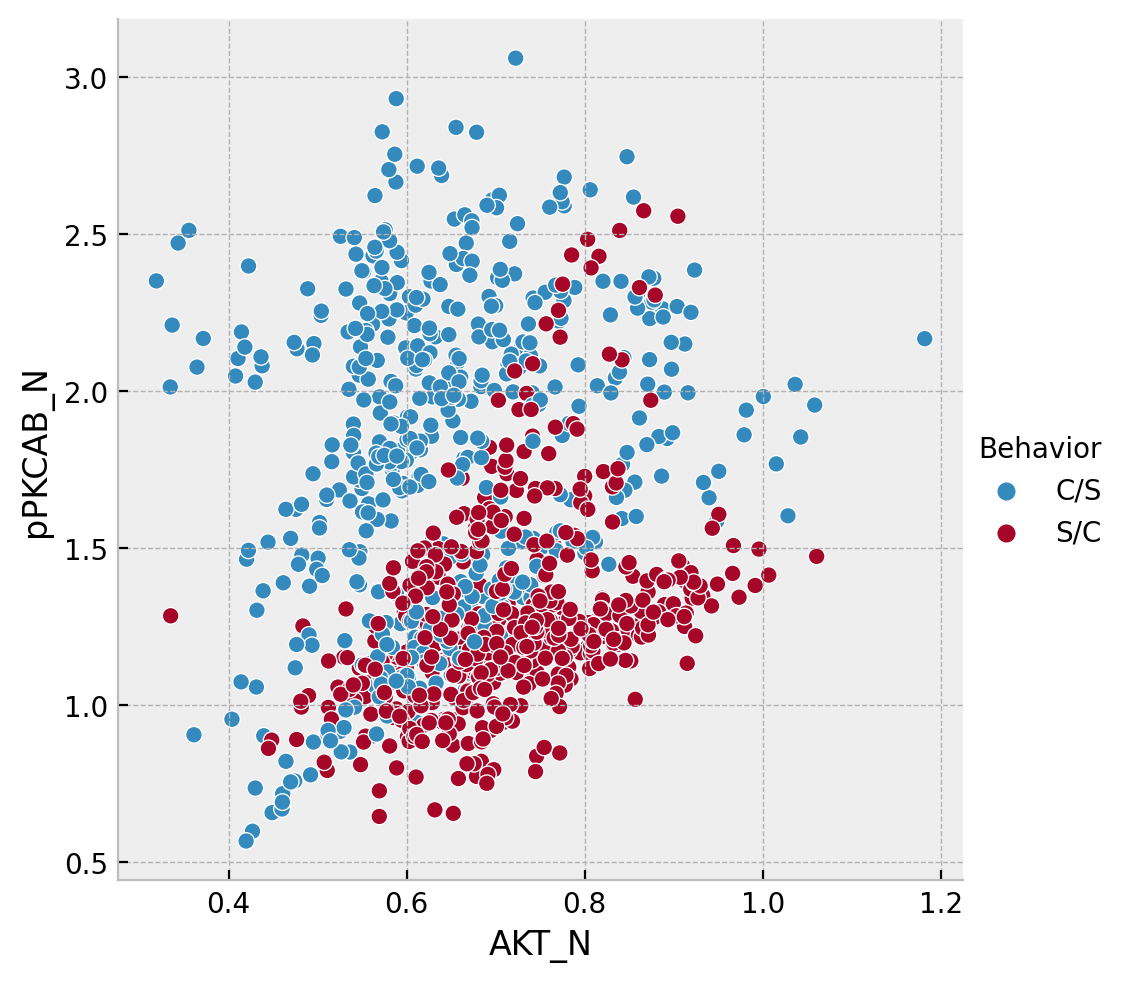

In [9]:
import seaborn as sns

sns.relplot(df2, x='AKT_N', y='pPKCAB_N', hue='Behavior');

What if you don't know anything about what behavioral training each mouse underwent?

Can you discern anything about how the mice might be grouped from just their `AKT_N` and `pPKCAB_N` expression levels?

# $k$-means clustering

1. Choose the number of clusters to use.
2. Choose a random center for each cluster.
3. Put each data point into the cluster whose center it is closest to.
4. Update the cluster centers to the mean of all points in the cluster.
5. Repeat 2-3 until cluster centers converge (i.e. don't change much anymore).

![kmeans EM algorithm](images/kmeans_EM.png "kmeans EM algorithm")

Can you predict whether a mouse underwent behavioral training based solely on expression of AKT_N andd pPKCAB_N using $k$-means clustering?

In [10]:
from sklearn.cluster import KMeans

X = df2[['AKT_N', 'pPKCAB_N']]
# !!! there is NO y, we don't have any labels to train with

model = KMeans(n_clusters=2, random_state=0)

model.fit(X)

labels = model.predict(X)
labels

/opt/miniconda3/envs/neu365p/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

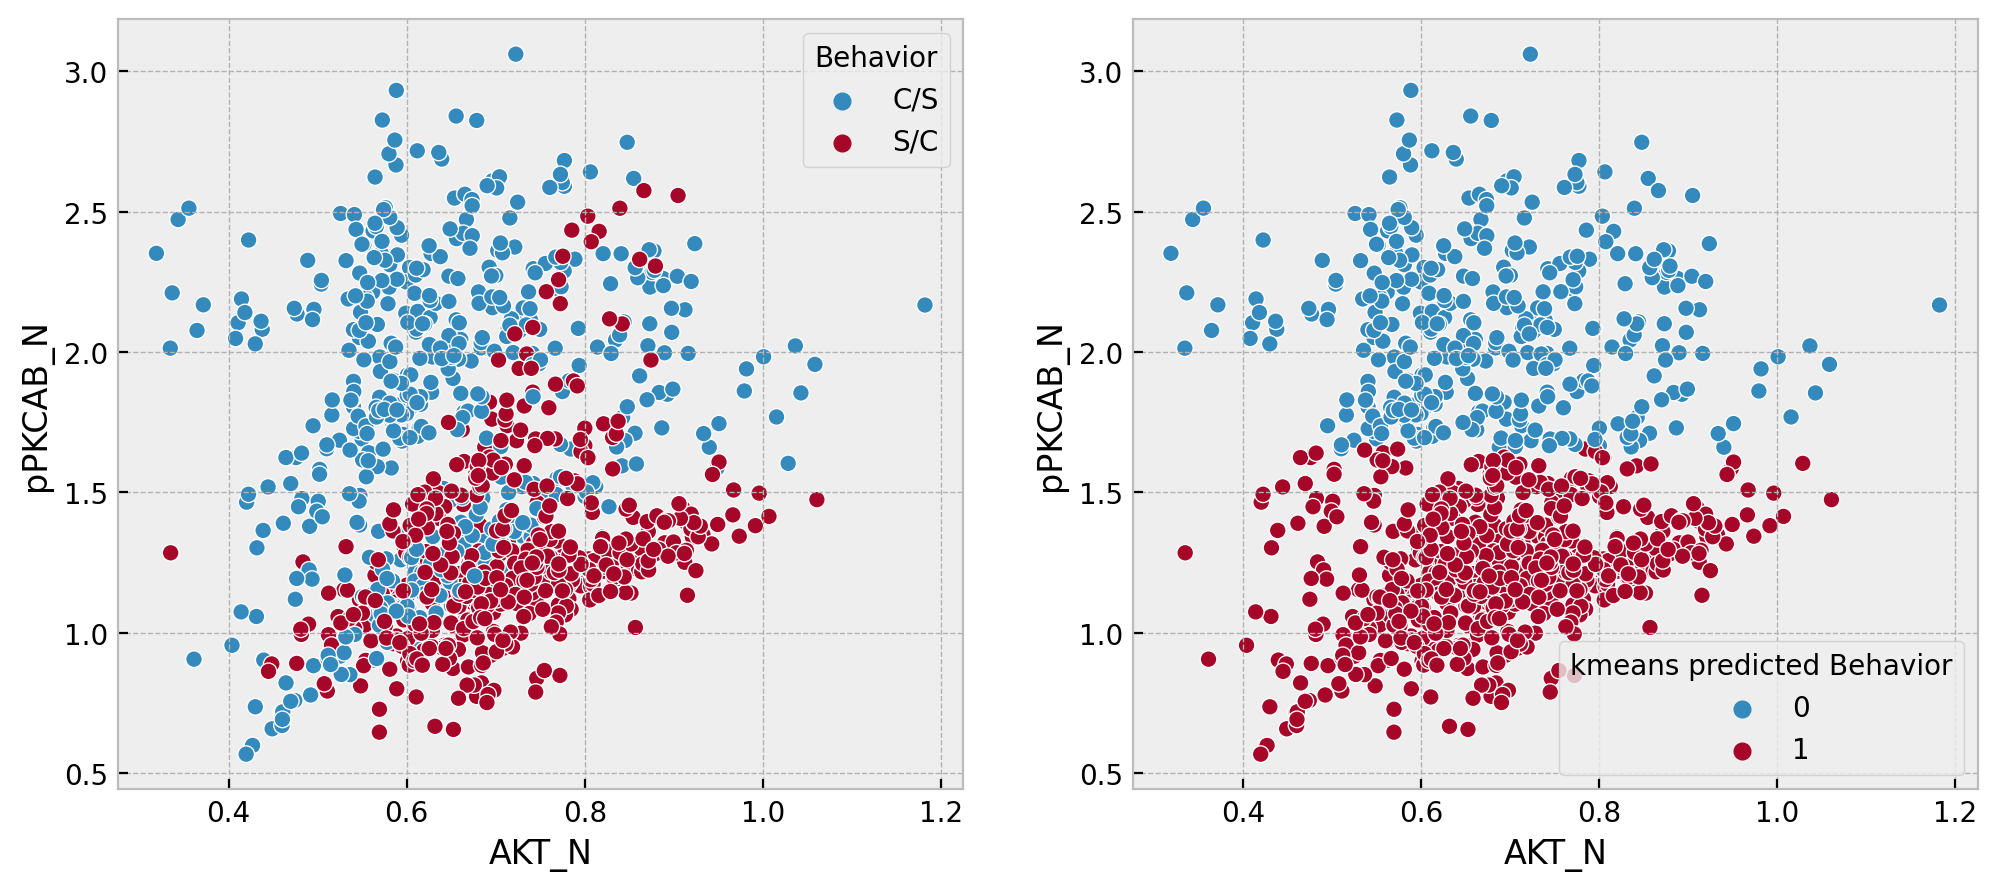

In [11]:
df2['kmeans predicted Behavior'] = labels

fig, ax = plt.subplots(1, 2, figsize=[12,5])
sns.scatterplot(df2, x='AKT_N', y='pPKCAB_N', hue='Behavior', ax=ax[0]);
sns.scatterplot(df2, x='AKT_N', y='pPKCAB_N', hue='kmeans predicted Behavior', ax=ax[1]);

Summarizing $k$-means clustering with *sklearn*

In [12]:
model = KMeans(n_clusters=2, n_init='auto')
model.fit(X)
clusterLabels = model.predict(X)

What can we predict about the mice based solely on expression of APP_N andd SOD1_N?

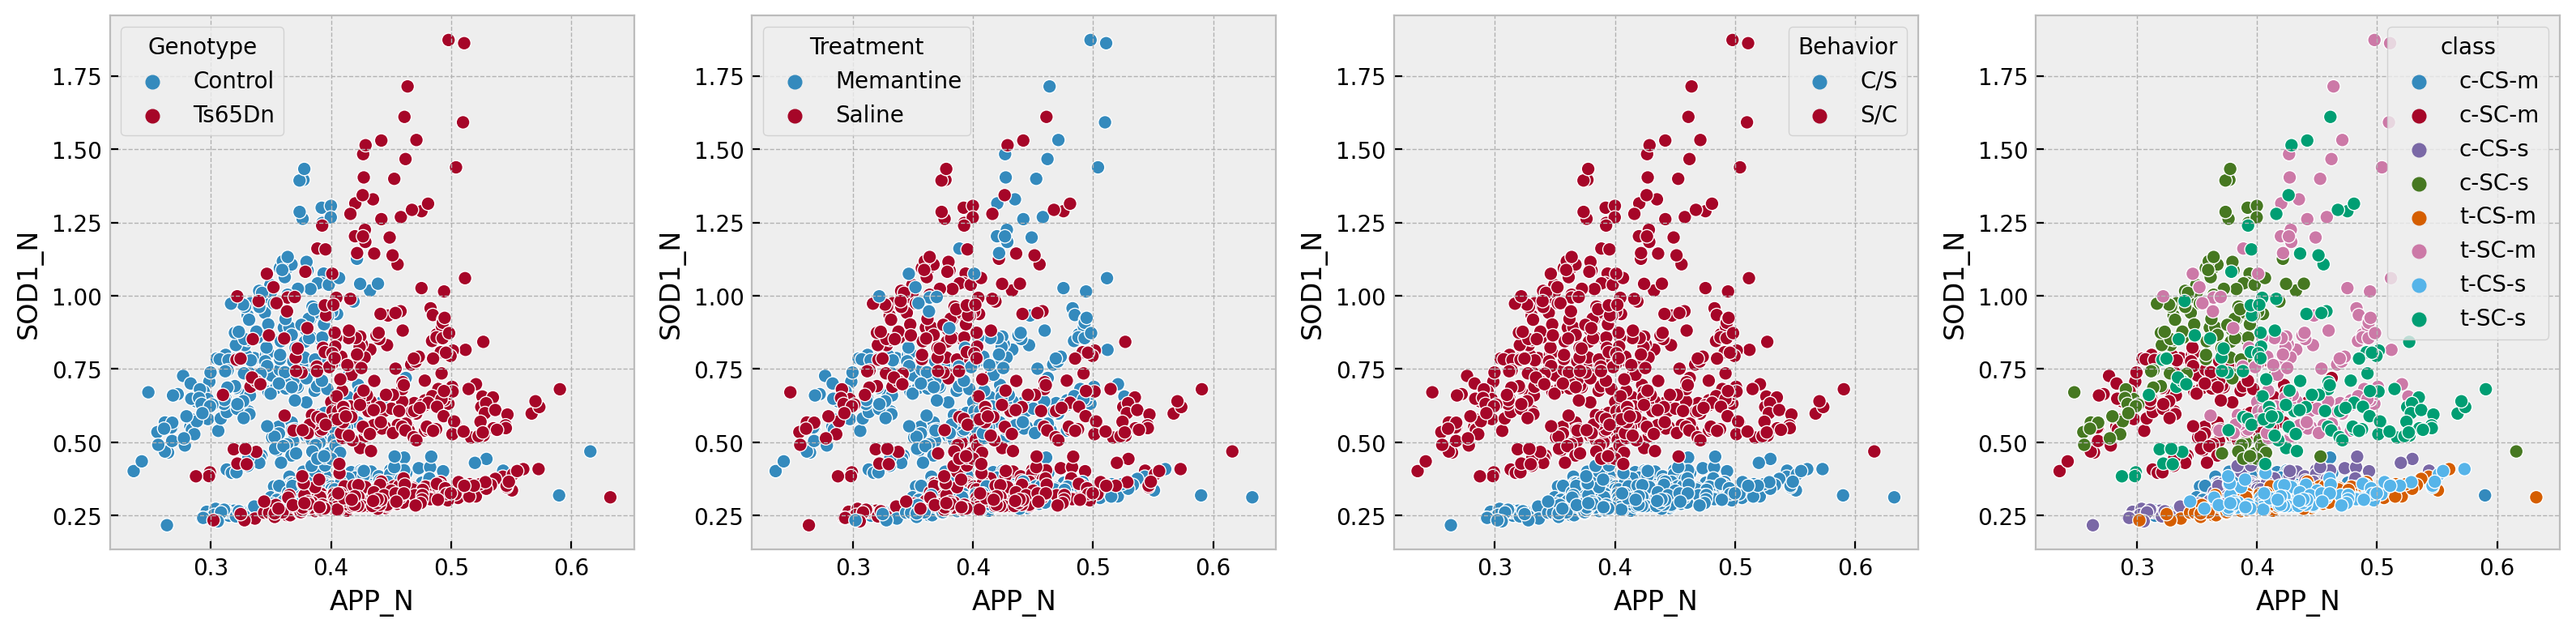

In [13]:
fig, ax = plt.subplots(1, 4, figsize=[16,4])
for i, column in enumerate(['Genotype', 'Treatment', 'Behavior', 'class']):
    sns.scatterplot(df2, x='APP_N', y='SOD1_N', hue=column, ax=ax[i]);
plt.tight_layout();

# Exercise

Use $k$-means to generate 4 and 8 clusters based on APP_N vs. SOD1_N expression levels.

Store the resulting cluster IDs in the variables `labels4` and `labels8`.

In [14]:
X = df2[['APP_N', 'SOD1_N']]

...
labels4 = ...

...
labels8 = ...

# Exercise Key

Use $k$-means to generate 4 and 8 clusters based on APP_N vs. SOD1_N expression levels.

Store the resulting cluster IDs in the variables `labels4` and `labels8`.

In [15]:
X = df2[['APP_N', 'SOD1_N']]

model4 = KMeans(n_clusters=4, n_init='auto')
model4.fit(X)
labels4 = model4.predict(X)

model8 = KMeans(n_clusters=8, n_init='auto')
model8.fit(X)
labels8 = model8.predict(X)

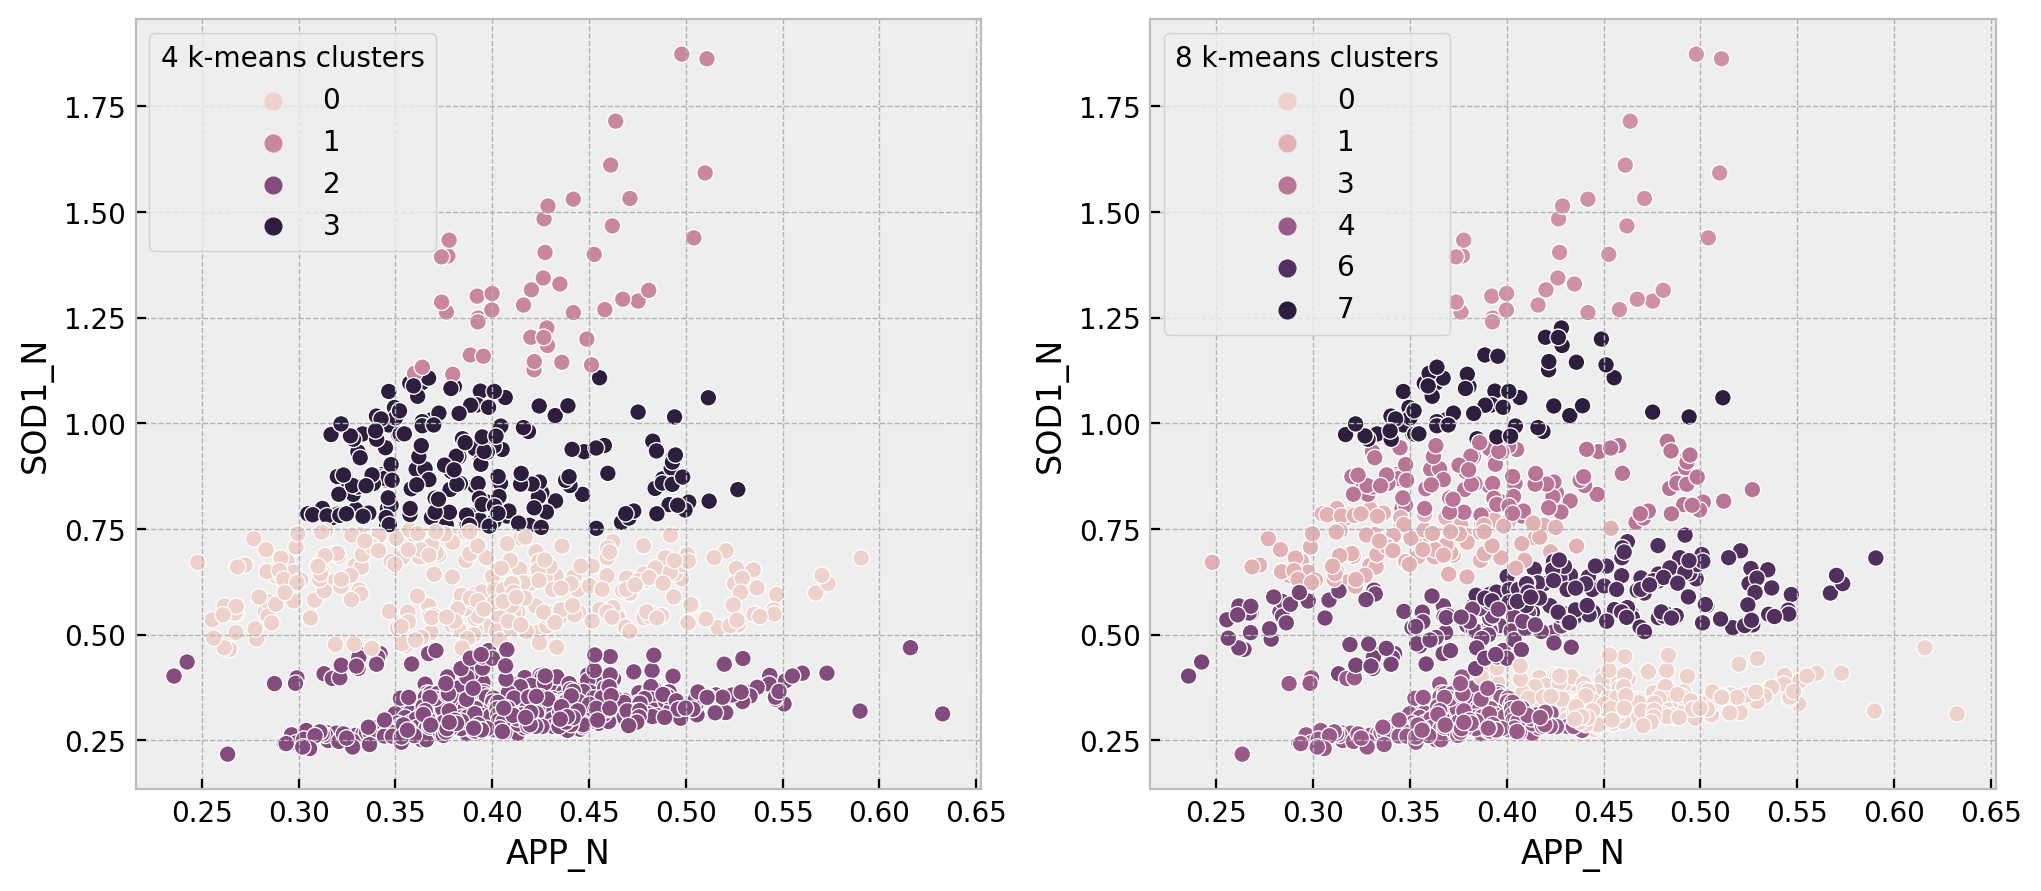

In [16]:
df2['4 k-means clusters'] = labels4
df2['8 k-means clusters'] = labels8

fig, ax = plt.subplots(1, 2, figsize=[12,5])
sns.scatterplot(df2, x='APP_N', y='SOD1_N', hue='4 k-means clusters', ax=ax[0]);
sns.scatterplot(df2, x='APP_N', y='SOD1_N', hue='8 k-means clusters', ax=ax[1]);

$k$-means requires you to specify the number of clusters up front.

But how many should you choose?

# Silhouette Score

Silhouette Score = (b-a) / max(a,b)

* a: average distance between each point within a cluster
* b: average distance between clusters

Ranges from -1 (clusters poorly separated) to +1 (clusters well separated)

![](images/silhouette-score.jpeg)

In [17]:
from sklearn.metrics import silhouette_score

X = df2[['APP_N', 'SOD1_N']]
model = KMeans(n_clusters=4, n_init='auto', random_state=0)
model.fit(X)
labels = model.predict(X)

silhouette_score(X, labels)

0.5743512006443094

What do you think about this score? Should we go with 4 clusters?

You are better off trying a bunch of different numbers of clusters and choosing the one with the maximum Silhouette score.

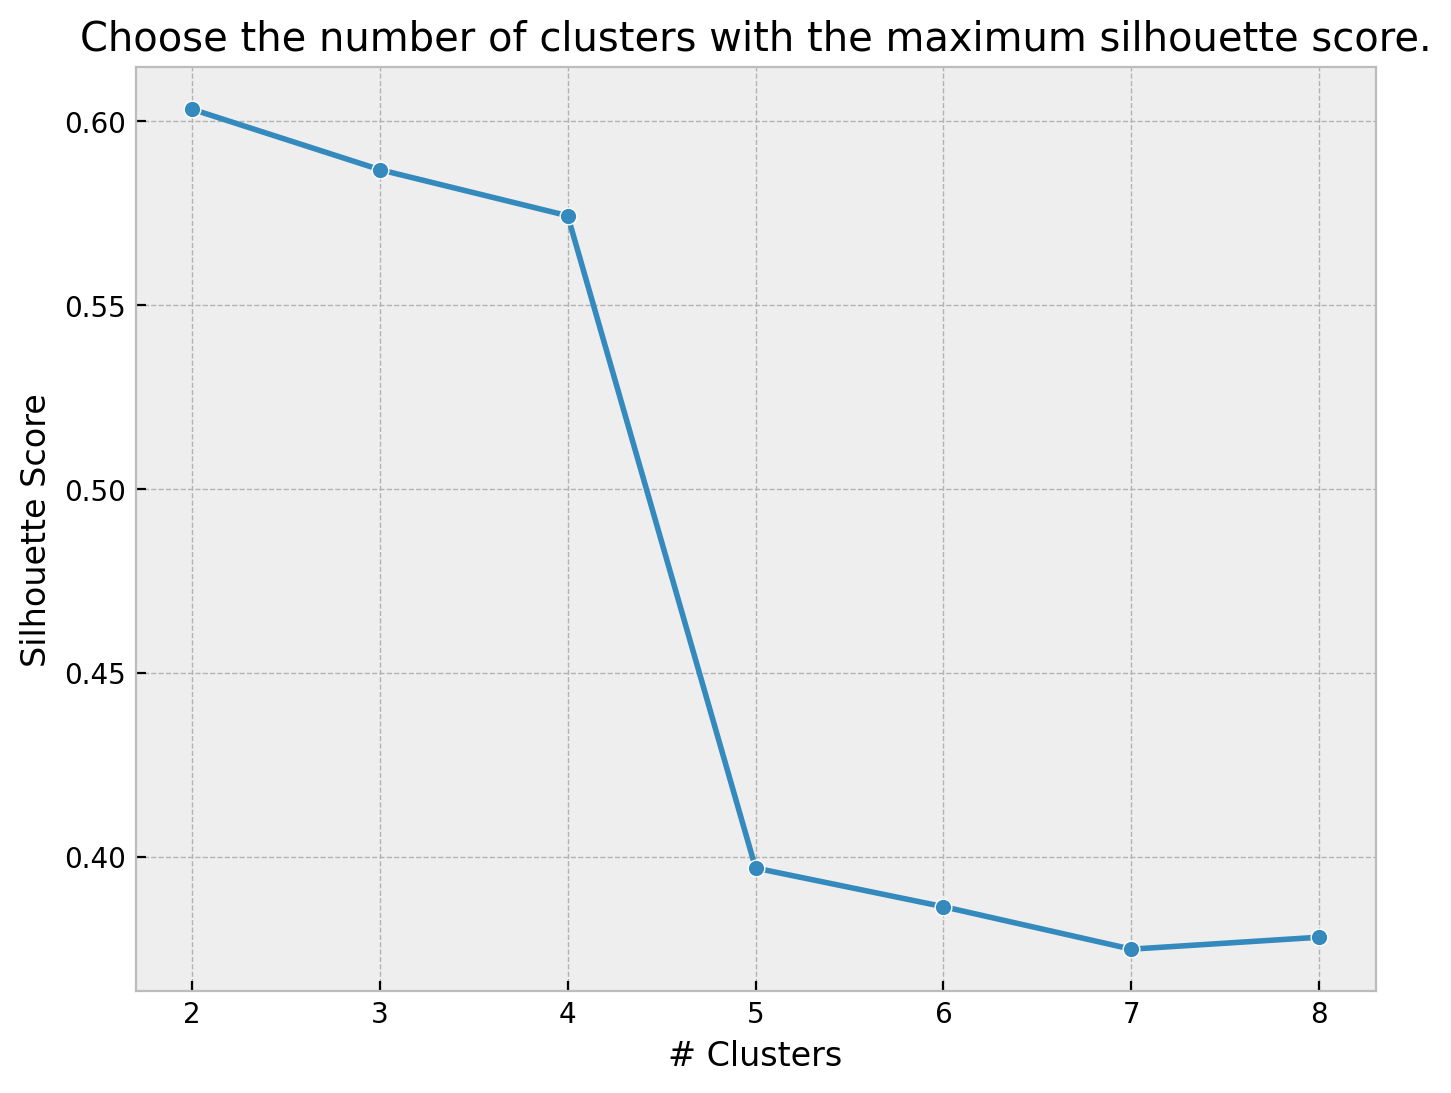

In [18]:
n_clusters = np.arange(2, 9)
silhouette_scores = np.zeros(n_clusters.shape)

for i, n in enumerate(n_clusters):
    model = KMeans(n_clusters=n, n_init='auto', random_state=0)
    model.fit(X)
    labels = model.predict(X)
    silhouette_scores[i] = silhouette_score(X, labels)

plt.plot(n_clusters, silhouette_scores, 'o-')
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')
plt.title('Choose the number of clusters with the maximum silhouette score.');

Choose the number of clusters with the maximum silhouette score.

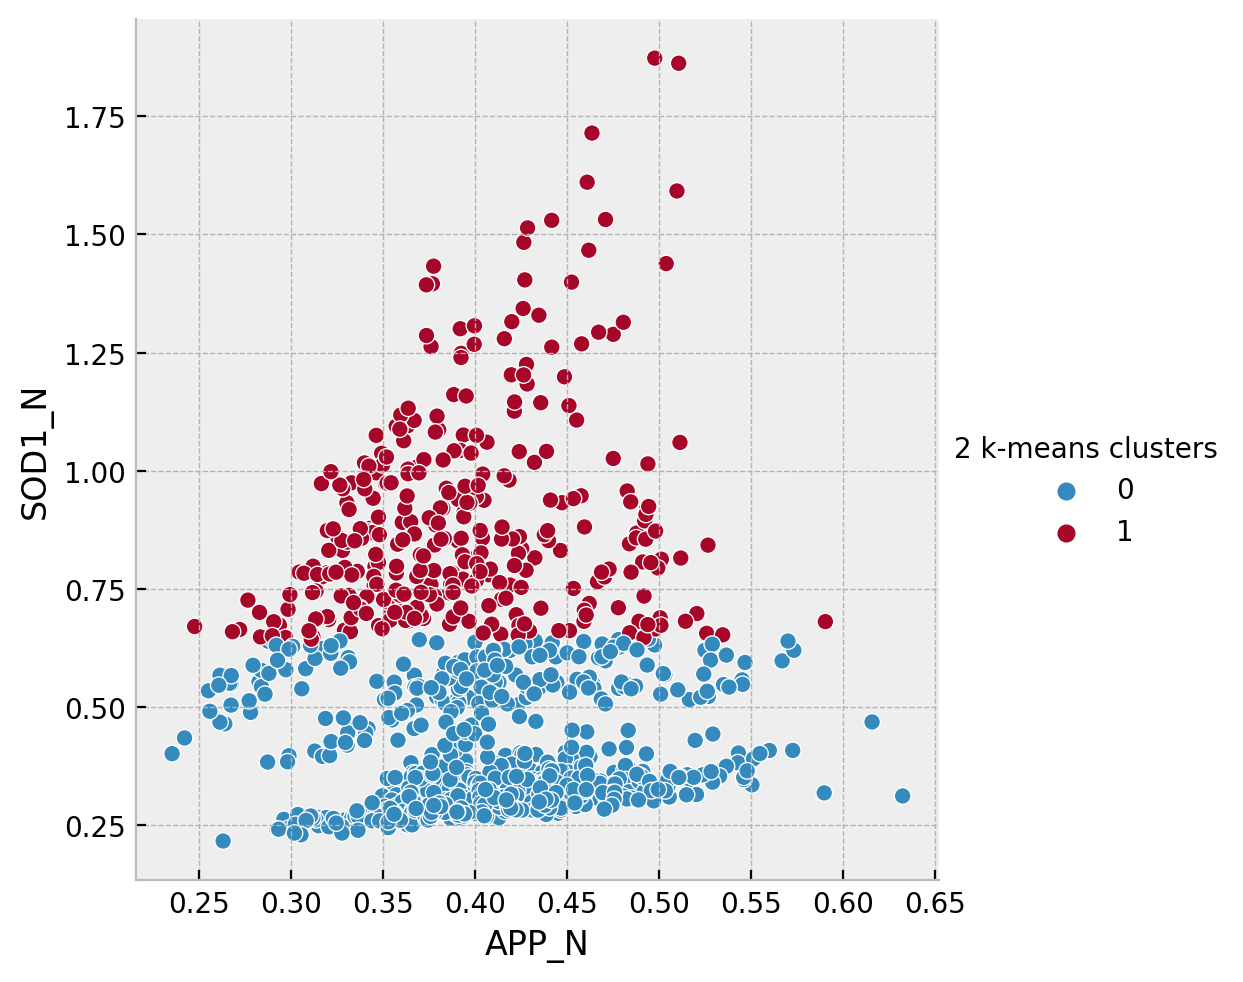

In [19]:
model = KMeans(n_clusters=2, n_init='auto', random_state=0)
model.fit(X)
labels = model.predict(X)

df2['2 k-means clusters'] = labels

sns.relplot(df2, x='APP_N', y='SOD1_N', hue='2 k-means clusters');

$k$-means is meant for clusters that approximate round blobs. For anything else you'll likely need a different algorithm.

### No clustering algorithm is perfect for everything. You'll have to assess the pros and cons based on your data.

Here are examples of how several algorithms perform on various types of data.

Some handy info on these methods at https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

Code at https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

![clustering algorithms](images/sphx_glr_plot_cluster_comparison_0011.png "Clustering Algorithms")

# Mean-Shift clustering

1. Start at a random point and specify a radius around that point.
2. Move to the mean of all the points within a specified radius.
3. Repeat 1-2 until converged (point no longer moves).

![mean-shift single window](images/mean-shift_single_window.gif "Mean-Shift Single Window")

Mean-Shift with multiple clusters

* For multiple clusters, start with a grid of points spaced over the entire data.
* Points that converge to locations within their radii are merged.
* Thus, you don't have to specify the numer of clusters, the algorithm will attempt to find the optimal number.
* !!! However, results depend on the selected radius.

![mean-shift many windows](images/mean-shift_many_windows.gif "Mean-Shift Many Windows")

Pros

* Will automatically find the optimal number of clusters.

Cons

* Results highly dependent on the specified search radius.

In [20]:
from sklearn.cluster import MeanShift

X = df2[['APP_N', 'SOD1_N']]

model = MeanShift()
model.fit(X)
labels = model.predict(X)

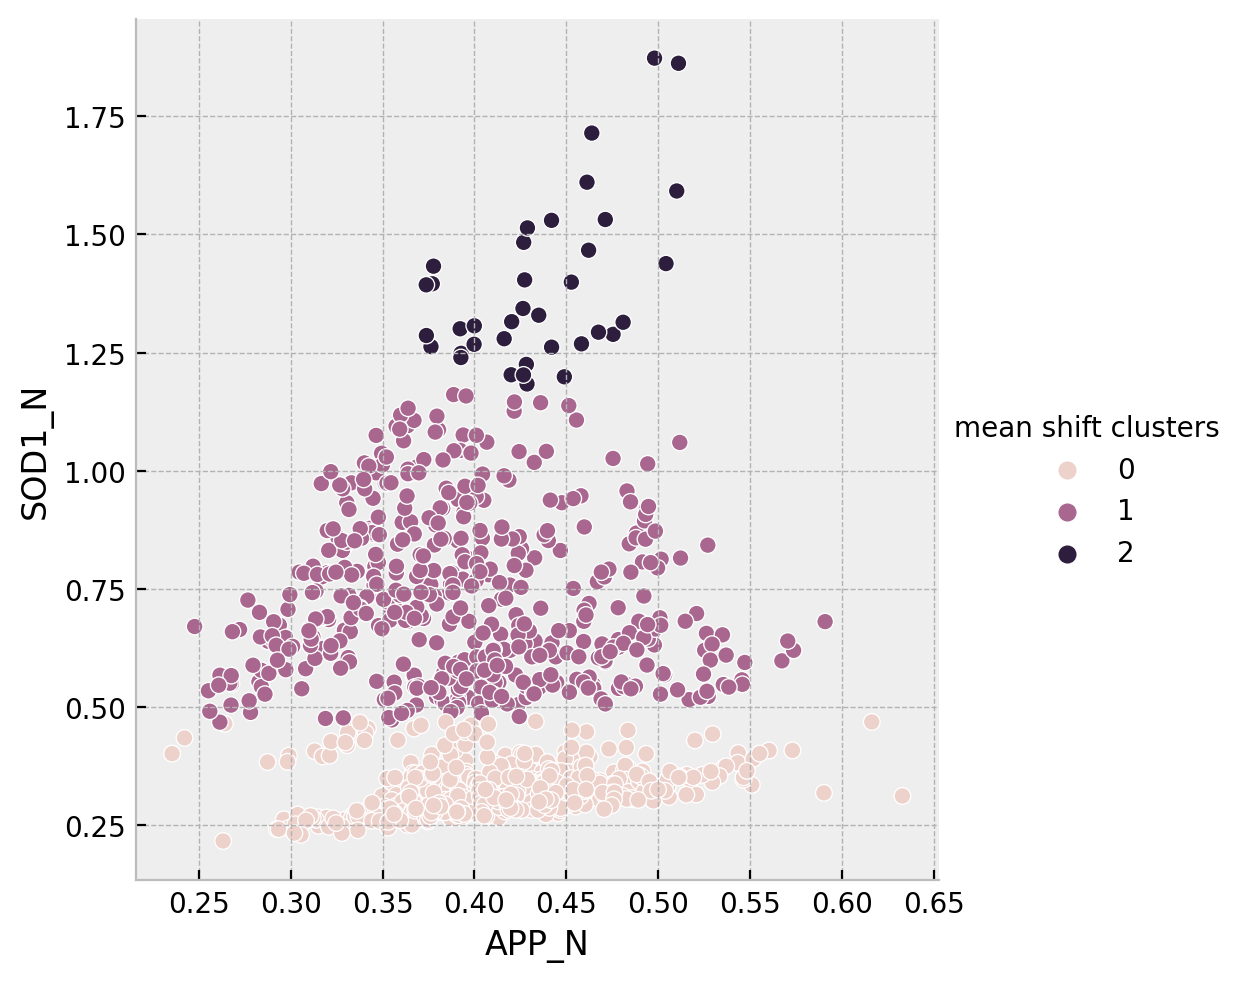

In [21]:
df2['mean shift clusters'] = labels

sns.relplot(df2, x='APP_N', y='SOD1_N', hue='mean shift clusters');

Starting clusters in a uniform grid spaced over the data rather than starting with each data point in its own cluster can be significantly faster for larger datasets

In [22]:
%%timeit
# start with each data point as its own cluster
model = MeanShift()
model.fit(X)
labels = model.predict(X)

1.15 s ± 8.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%%timeit
# start with uniform grid of clusters spread over data points
model = MeanShift(bin_seeding=True)
model.fit(X)
labels = model.predict(X)

72.3 ms ± 244 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Explore changing the radius (bandwidth).

In [24]:
modelA = MeanShift(bandwidth=0.1, bin_seeding=True)
modelA.fit(X)
labelsA = modelA.predict(X)

modelB = MeanShift(bandwidth=0.2, bin_seeding=True)
modelB.fit(X)
labelsB = modelB.predict(X)

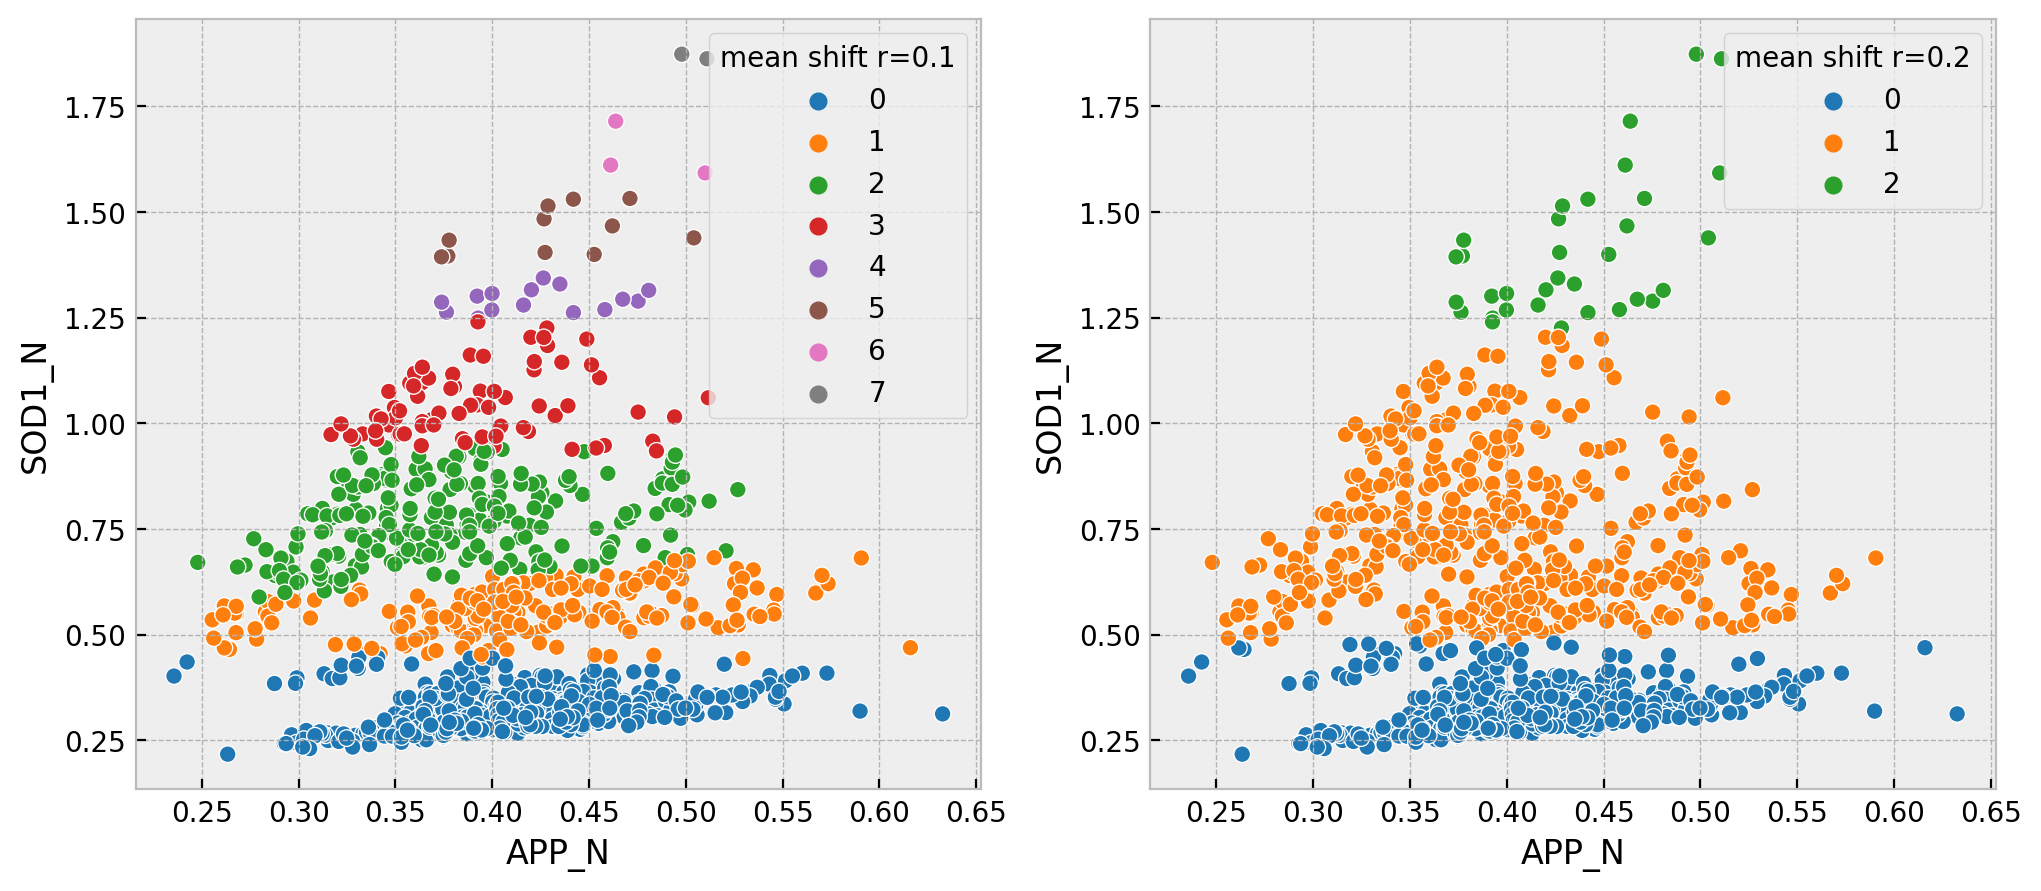

In [25]:
df2['mean shift r=0.1'] = labelsA
df2['mean shift r=0.2'] = labelsB

fig, ax = plt.subplots(1, 2, figsize=[12,5])
sns.scatterplot(df2, x='APP_N', y='SOD1_N', hue='mean shift r=0.1', ax=ax[0], palette='tab10');
sns.scatterplot(df2, x='APP_N', y='SOD1_N', hue='mean shift r=0.2', ax=ax[1], palette='tab10');

Estimating the radius (bandwidth) to use based on pairwise distances in the data.

In [26]:
from sklearn.cluster import estimate_bandwidth

# bandwidth estimated from 20% quantile of all pairwise distances
bandwidth = estimate_bandwidth(X, quantile=0.2)
bandwidth

0.1381093658960041

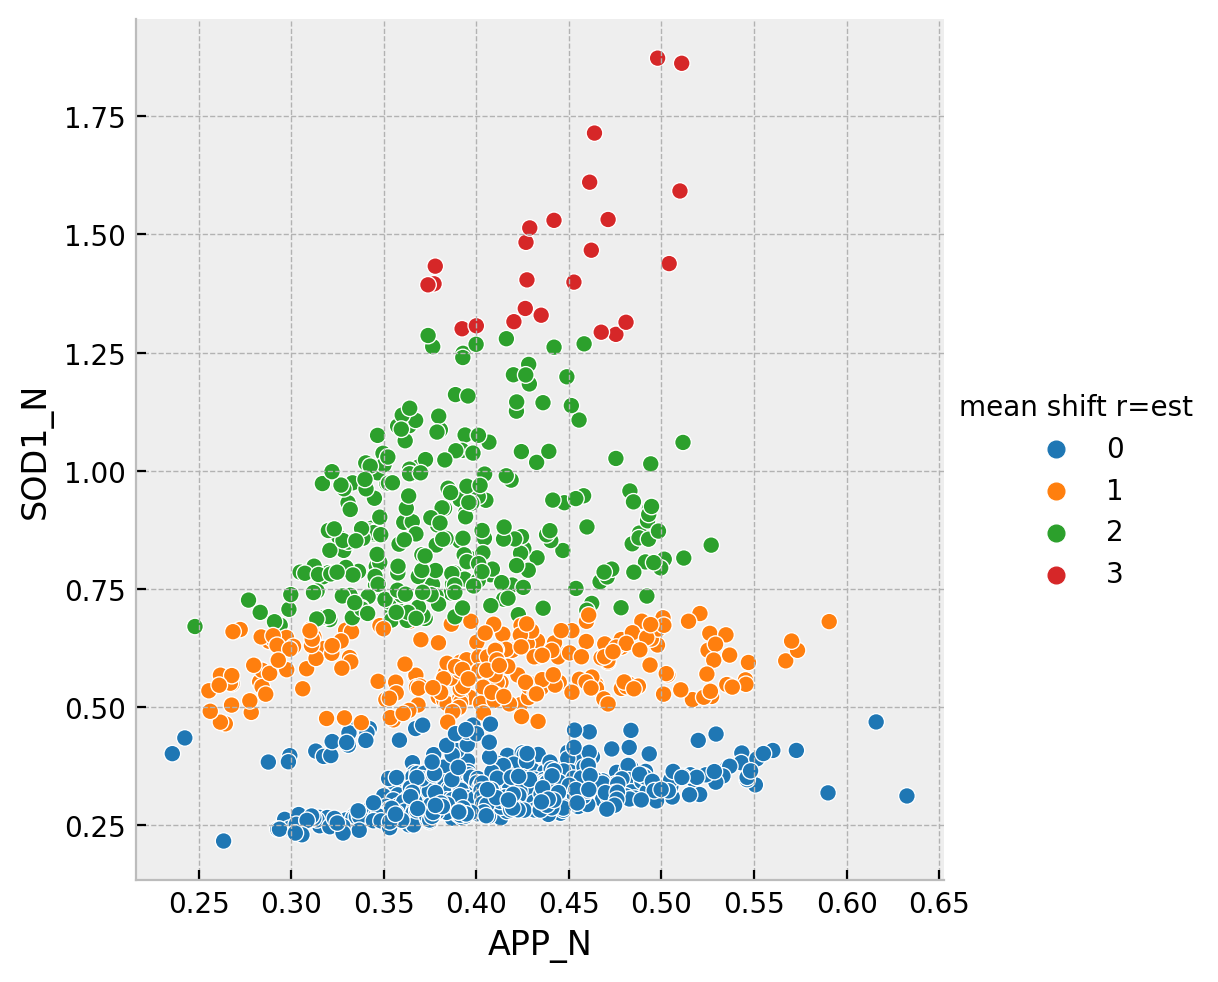

In [27]:
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model.fit(X)
labels = model.predict(X)

df2['mean shift r=est'] = labels

sns.relplot(df2, x='APP_N', y='SOD1_N', hue='mean shift r=est', palette='tab10');

Which bandwidth is best?

You can use a scoring metric like Silhouette score to evaluate how good various bandwidths are.

In [28]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

X = df2[['APP_N', 'SOD1_N']]

bandwidths = np.arange(0.05, 0.5, 0.05)
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for r in bandwidths:
    model = MeanShift(bandwidth=r, bin_seeding=True)
    model.fit(X)
    labels = model.predict(X)
    if len(np.unique(labels)) == 1:
        break
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))

bandwidths = bandwidths[:len(silhouette_scores)]

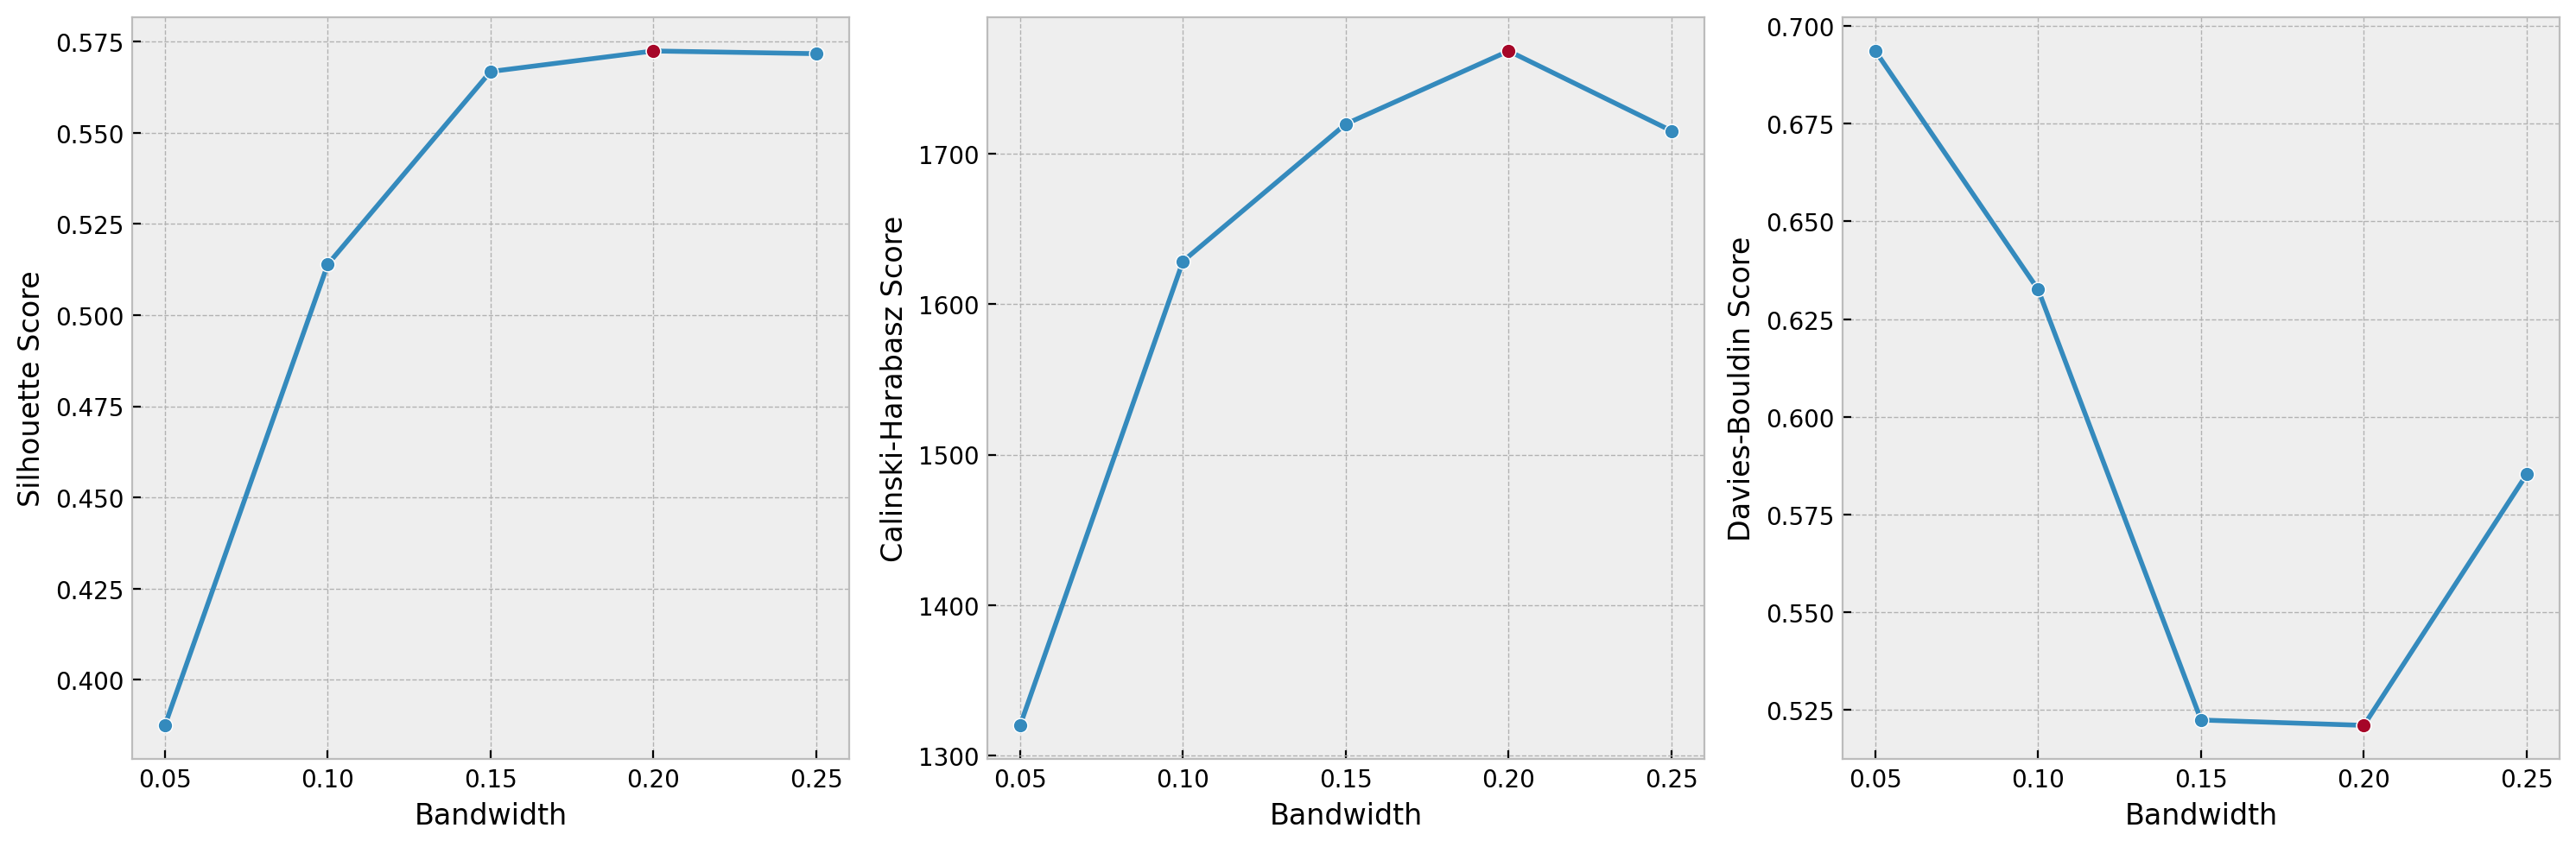

In [29]:
# bandwidth vs. scores
plt.figure(figsize=[15,5])
plt.subplot(1 ,3, 1)
plt.plot(bandwidths, silhouette_scores, 'o-', label='silhouette')
best_ind = np.argmax(silhouette_scores)
plt.plot(bandwidths[best_ind], silhouette_scores[best_ind], 'o-')
plt.xticks(bandwidths)
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette Score')
plt.subplot(1, 3, 2)
plt.plot(bandwidths, calinski_harabasz_scores, 'o-', label='calinski-harabasz')
best_ind = np.argmax(calinski_harabasz_scores)
plt.plot(bandwidths[best_ind], calinski_harabasz_scores[best_ind], 'o-')
plt.xticks(bandwidths)
plt.xlabel('Bandwidth')
plt.ylabel('Calinski-Harabasz Score')
plt.subplot(1, 3, 3)
plt.plot(bandwidths, davies_bouldin_scores, 'o-', label='davies-bouldin')
best_ind = np.argmin(davies_bouldin_scores)
plt.plot(bandwidths[best_ind], davies_bouldin_scores[best_ind], 'o-')
plt.xticks(bandwidths)
plt.xlabel('Bandwidth')
plt.ylabel('Davies-Bouldin Score')
# plt.legend()
plt.tight_layout();

# Gaussian Mixture Model (GMM)

* Need to specify the number of clusters.
* Unlike $k$-means which is primarily for round (e.g. circular) blobs, GMMs can fit eliptical blobs.

![GMM](images/gmm.gif "GMM")

GMM clusters can overlap.

![overlap clusters](images/overlapping_gaussians.png "Overlapping Clusters")

Each data point has a probability to belong to each cluster.

![overlap GMM](images/overlapping_gaussians2.png "Overlapping GMM")

In [30]:
from sklearn.mixture import GaussianMixture

X = df2[['APP_N', 'SOD1_N']]

model = GaussianMixture(n_components=4)
model.fit(X)
labels = model.predict(X)

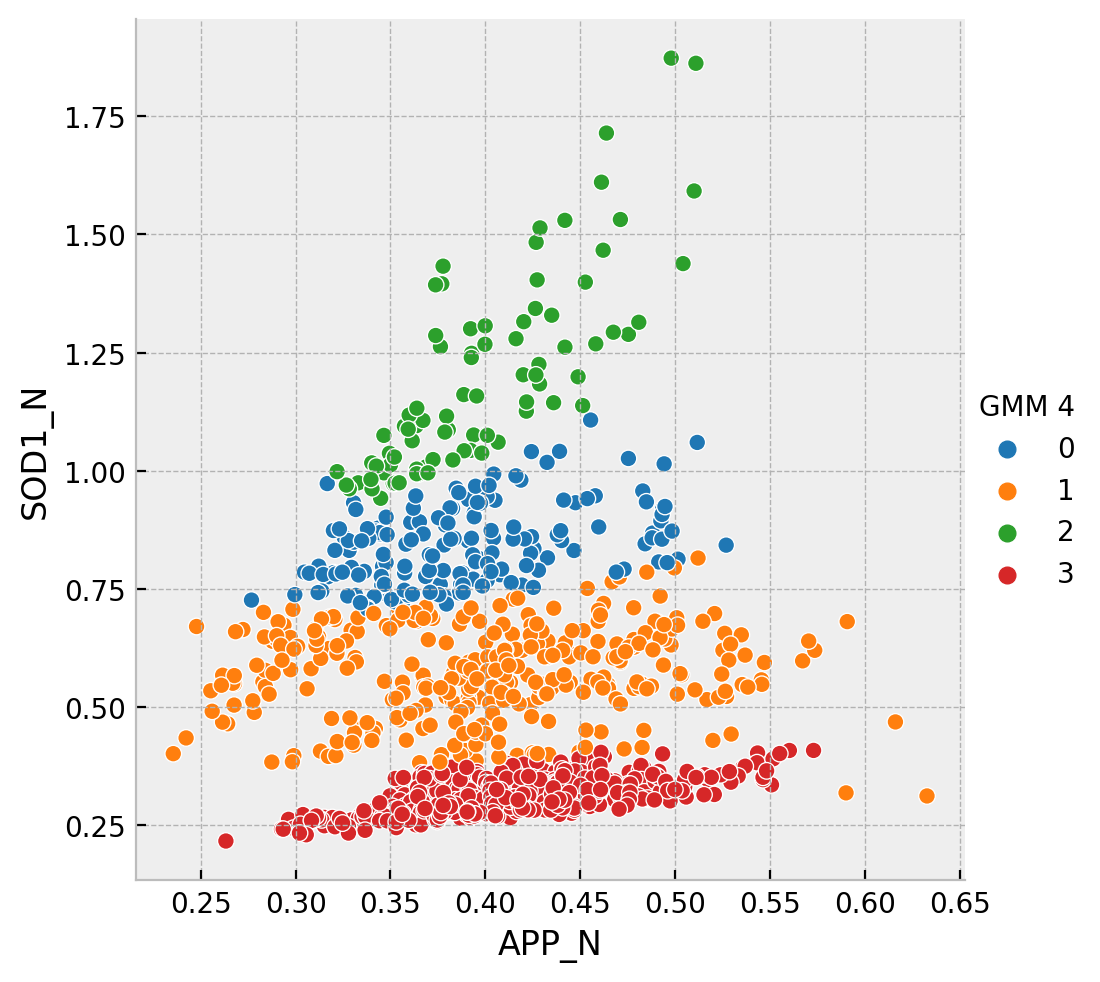

In [31]:
df2['GMM 4'] = labels

sns.relplot(df2, x='APP_N', y='SOD1_N', hue='GMM 4', palette='tab10');

Probability of each data point belonging to each custer.

In [32]:
proba = model.predict_proba(X)

proba.round(3)

array([[0.   , 0.057, 0.   , 0.943],
       [0.   , 0.019, 0.   , 0.981],
       [0.   , 0.021, 0.   , 0.979],
       ...,
       [0.251, 0.555, 0.195, 0.   ],
       [0.406, 0.466, 0.129, 0.   ],
       [0.772, 0.215, 0.014, 0.   ]])

# GMMs: How many components to choose?

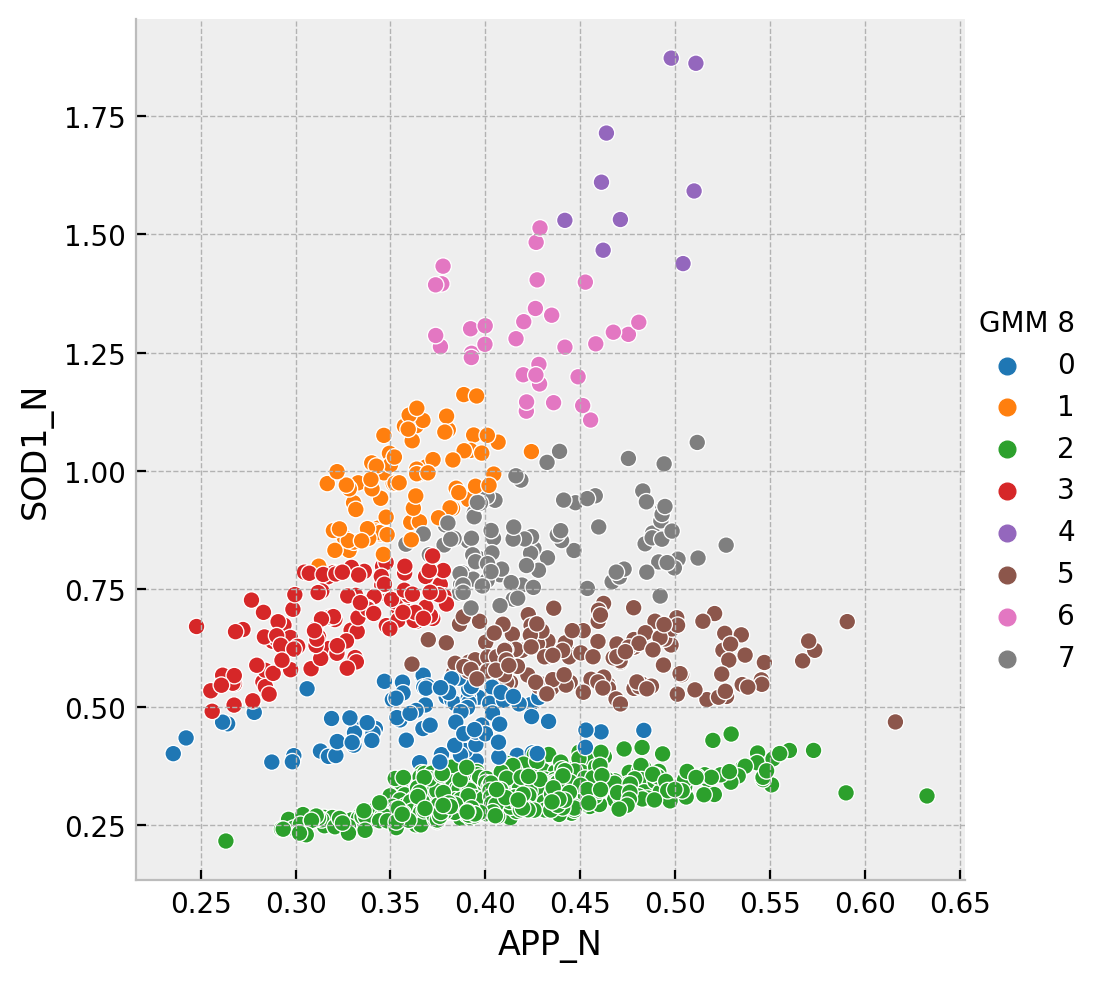

In [33]:
n = 8

model = GaussianMixture(n_components=n)
model.fit(X)
labels = model.predict(X)

df2[f'GMM {n}'] = labels
sns.relplot(df2, x='APP_N', y='SOD1_N', hue=f'GMM {n}', palette='tab10');

### Objective functions such as Bayesian Information Criterion (BIC)

### $BIC = ln(n) * k - 2 * ln(L)$

* $k$ = number of model parameters (Gaussian centers, standard deviations, and rotations)
* $n$ = number of data points
* $L$ = likelihood of the model given the data

In [34]:
n_components = np.arange(1, 21)
BIC_scores = np.zeros(n_components.shape)

for i, n in enumerate(n_components):
    model = GaussianMixture(n_components=n, random_state=0)
    model.fit(X)
    BIC_scores[i] = model.bic(X)

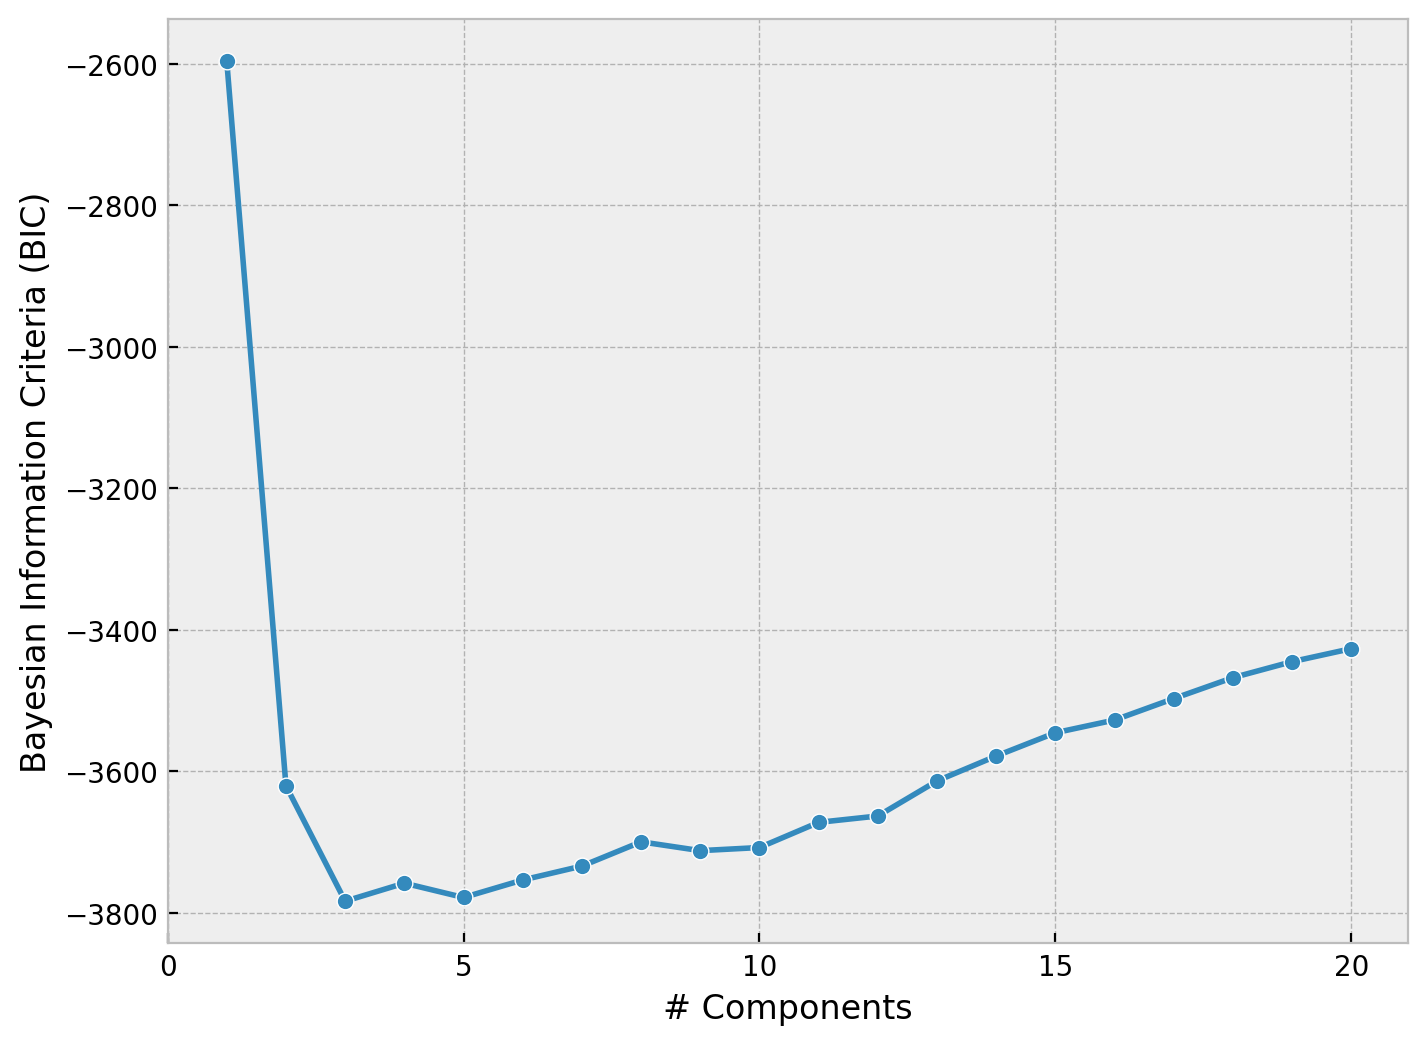

In [35]:
plt.plot(n_components, BIC_scores, 'o-')
plt.xticks(range(0, 21, 5))
plt.xlabel('# Components');
plt.ylabel('Bayesian Information Criteria (BIC)');

In [36]:
best_index = np.argmin(BIC_scores)
best_n = n_components[best_index]
best_n

3

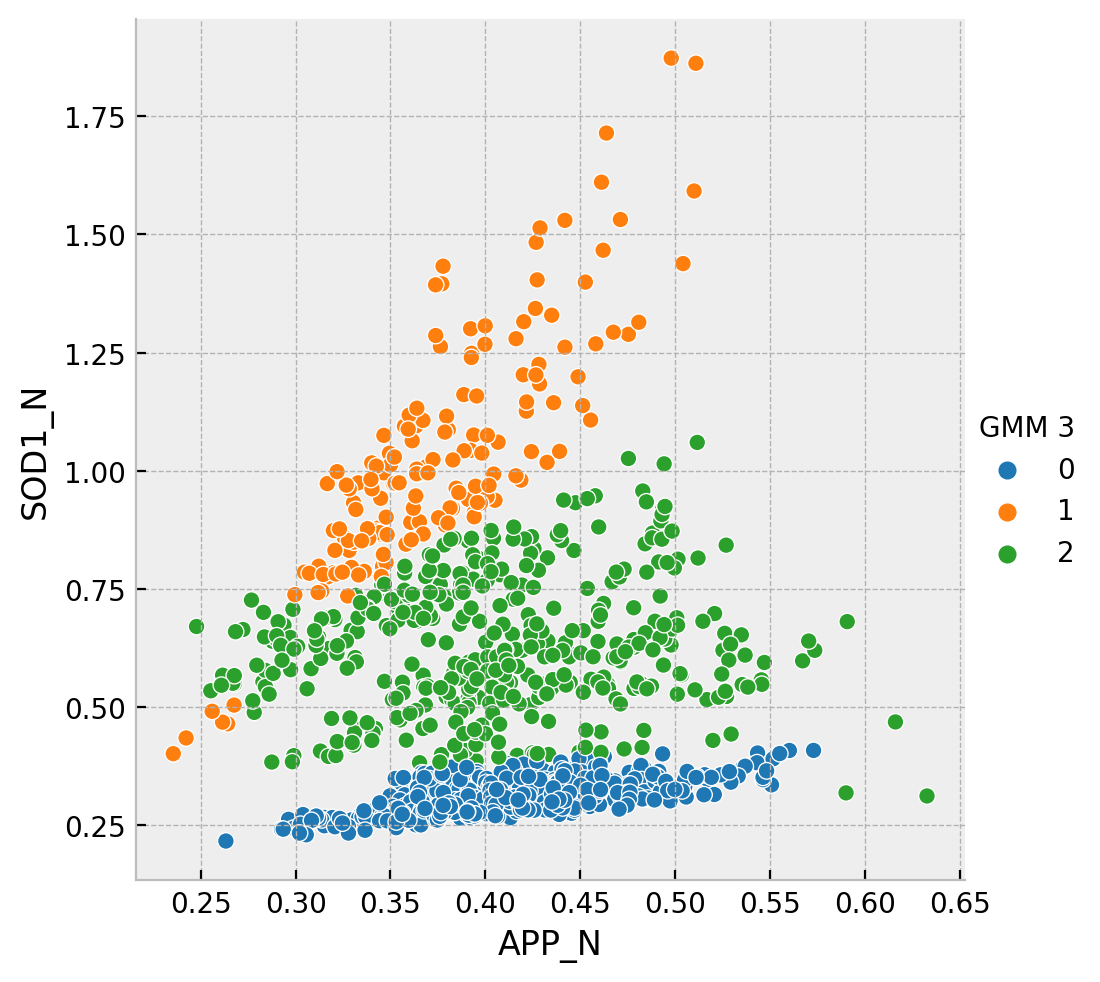

In [37]:
best_model = GaussianMixture(n_components=best_n)
best_model.fit(X)
labels = best_model.predict(X)

df2[f'GMM {best_n}'] = labels
sns.relplot(df2, x='APP_N', y='SOD1_N', hue=f'GMM {best_n}', palette='tab10');

# Exercise

Use a GMM and BIC to determine the number of clusters to use in the data below.

Plot the data colored by the predicted cluster.

In [ ]:
X = df2[['AKT_N', 'pPKCAB_N']]

# determine number of GMM clusters to use
...
best_n = ...

# GMM clustering
...
labels = ...

# plot results
df2[f'GMM {best_n}'] = labels
sns.relplot(df2, x='AKT_N', y='pPKCAB_N', hue=f'GMM {best_n}', palette='tab10');

# Exercise Key

Use a GMM and BIC to determine the number of clusters to use in the data below.

Plot the data colored by the predicted cluster.

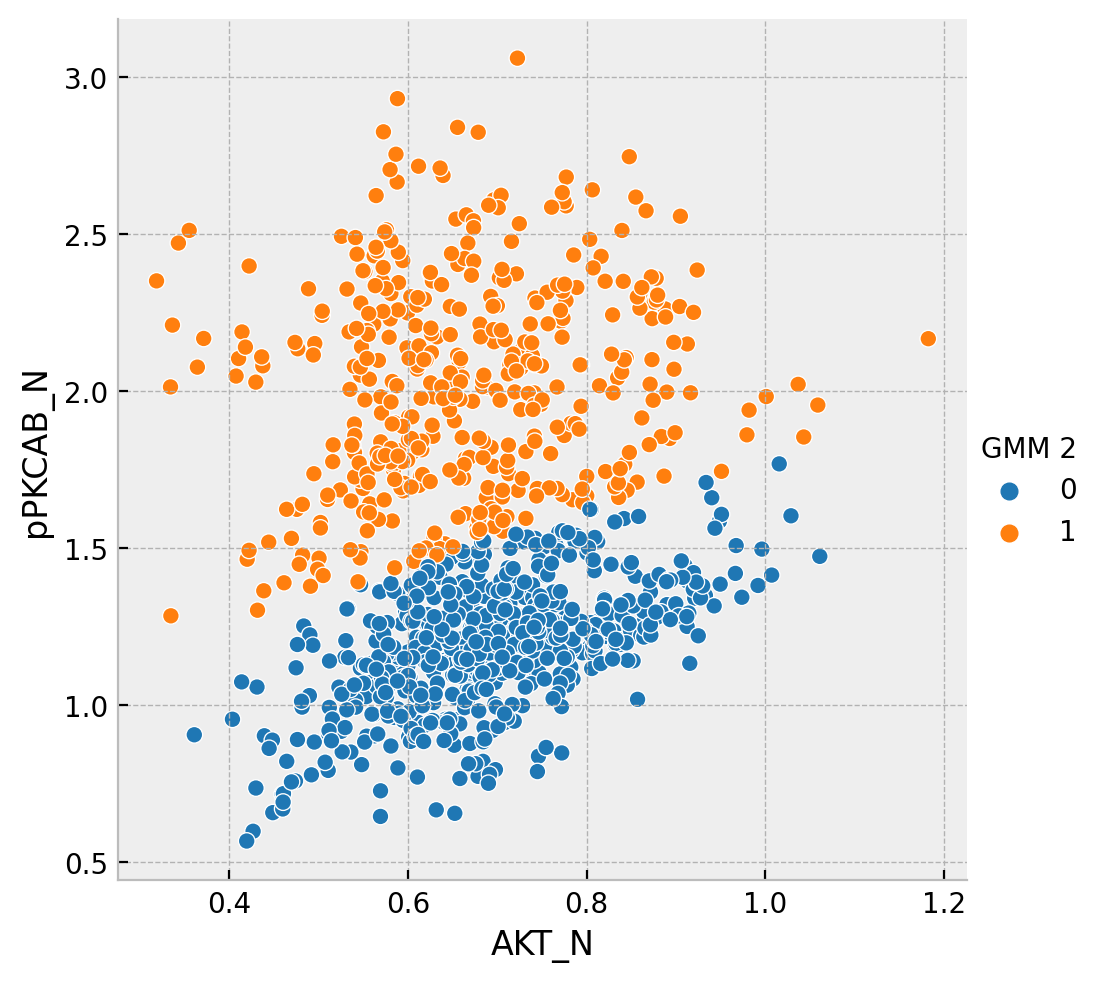

In [39]:
X = df2[['AKT_N', 'pPKCAB_N']]

# determine number of GMM clusters to use
n_clusters = np.arange(1, 21)
BIC_scores = np.zeros(n_clusters.shape)
for i, n in enumerate(n_clusters):
    model = GaussianMixture(n_components=n, random_state=0)
    model.fit(X)
    BIC_scores[i] = model.bic(X)
best_n = n_clusters[np.argmin(BIC_scores)]

# GMM clustering
best_model = GaussianMixture(n_components=best_n)
best_model.fit(X)
labels = best_model.predict(X)

# plot results
df2[f'GMM {best_n}'] = labels
sns.relplot(df2, x='AKT_N', y='pPKCAB_N', hue=f'GMM {best_n}', palette='tab10');

---
# Heirarchical Agglomerative clustering

Start with all data points in separate clusters and iteravely combine the closest clusters together. 

![HAC](images/hac.gif "HAC")

* **affinity**: How to compute distances.
    * **euclidean** is the standard measure of distance you are all familiar with.
    * **manhattan** is distance on a grid like walking city blocks
    * etc.
* **linkage**: How to decide which two clusters to merge next. Always choose to merge the two clusters that minimize the linkage.
    * **ward** minimizes the variance of the clusters being merged.
    * **average** uses the average of the distances of each observation of the two sets.
    * **complete** or maximum linkage uses the maximum distances between all observations of the two sets.
    * **single** uses the minimum of the distances between all observations of the two sets.

In [40]:
from sklearn.cluster import AgglomerativeClustering

X = df2[['APP_N', 'SOD1_N']]

model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = model.fit_predict(X)
# !!! model.predict does not exist!

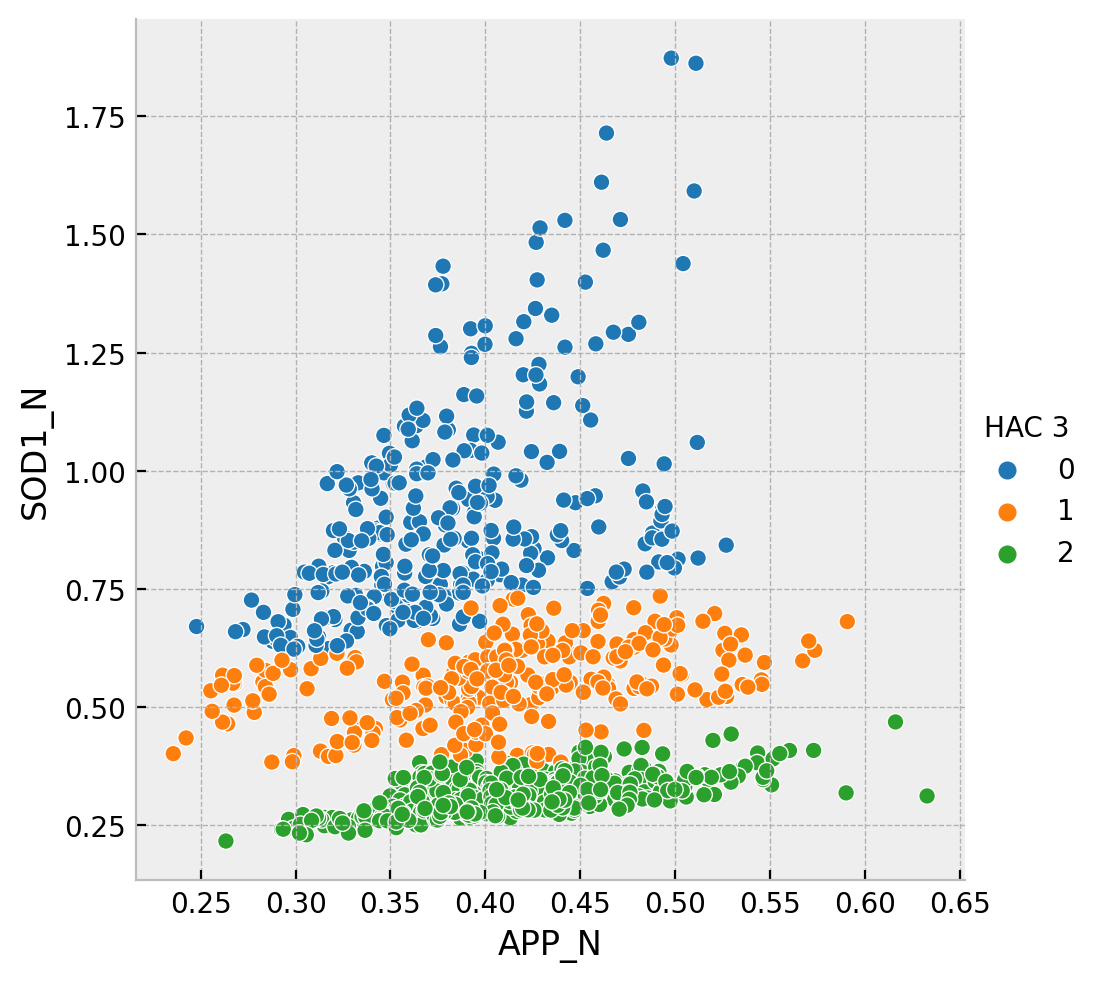

In [41]:
df2['HAC 3'] = labels
sns.relplot(df2, x='APP_N', y='SOD1_N', hue='HAC 3', palette='tab10');

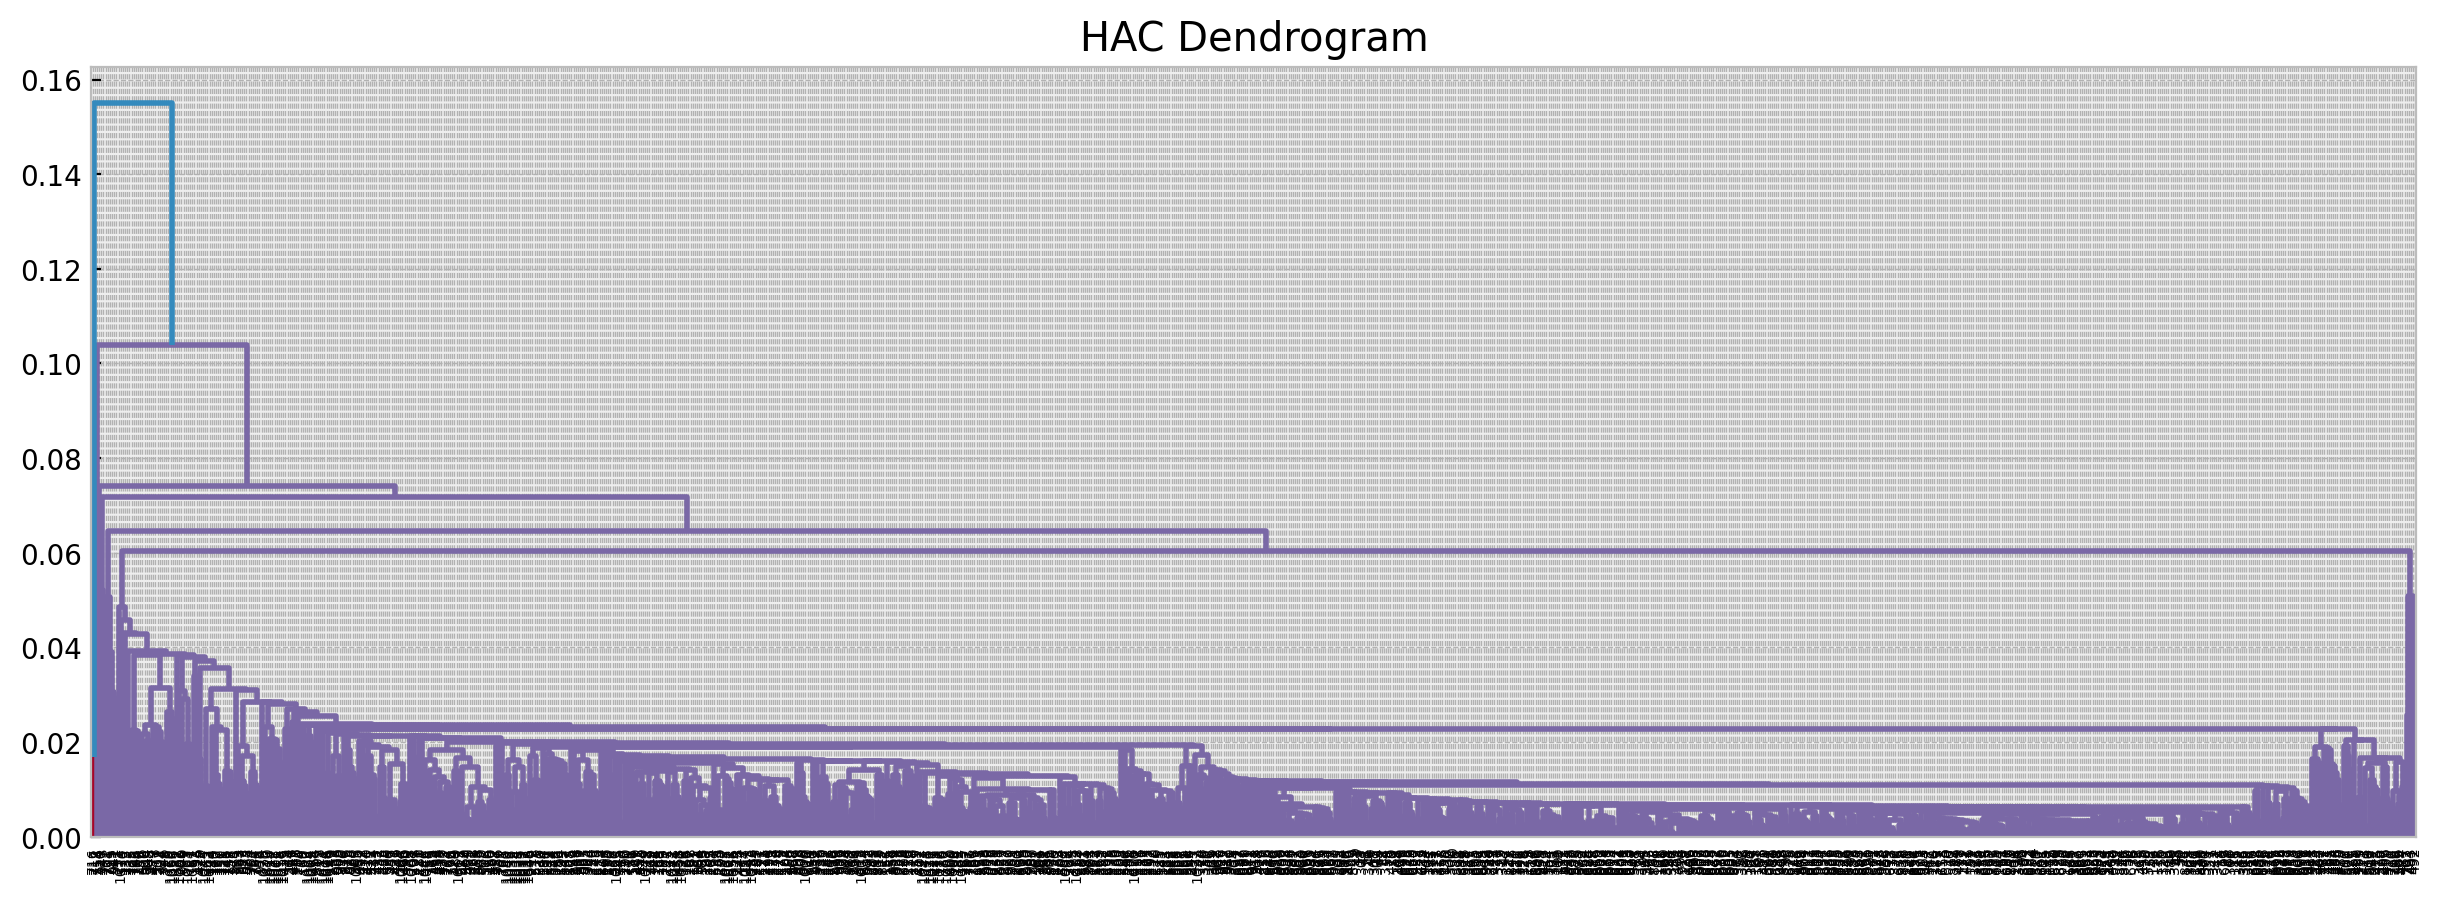

In [42]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=[15,5])
sch.dendrogram(sch.linkage(X, method='single'));
plt.title('HAC Dendrogram');

---
# Density-Based Spatial Clustering (DBSCAN)

![DBSCAN](images/dbscan.gif "DBSCAN")

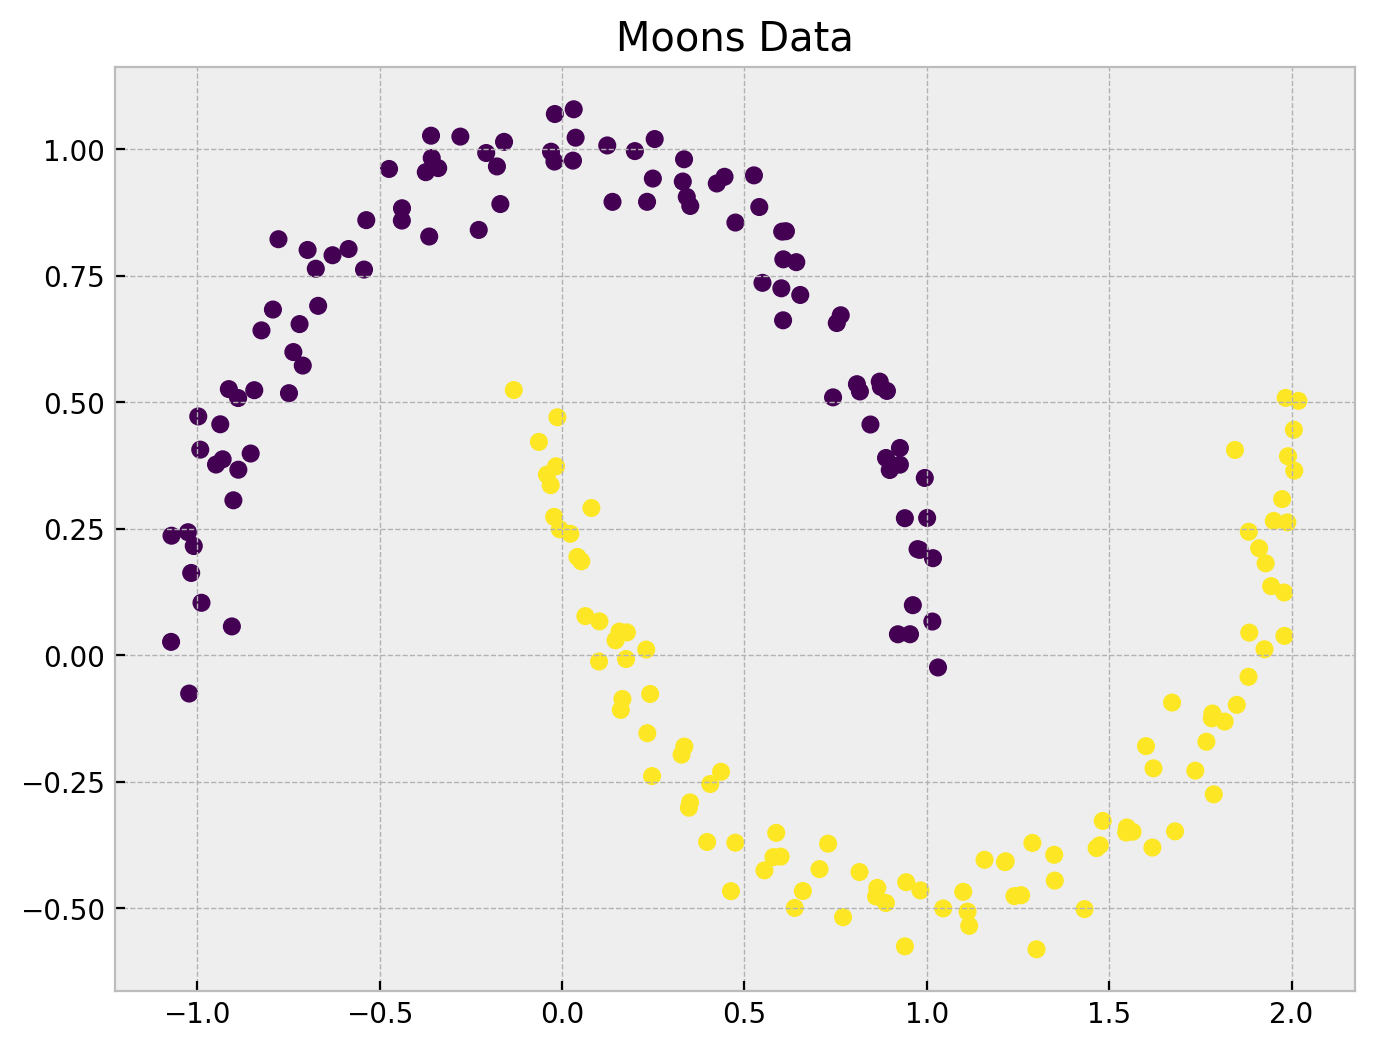

In [43]:
from sklearn.datasets import make_moons

X, knownLabels = make_moons(200, noise=.05, random_state=0)

plt.scatter(X[:,0], X[:,1], c=knownLabels);
plt.title('Moons Data');

In [44]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=5)
labels = model.fit_predict(X)

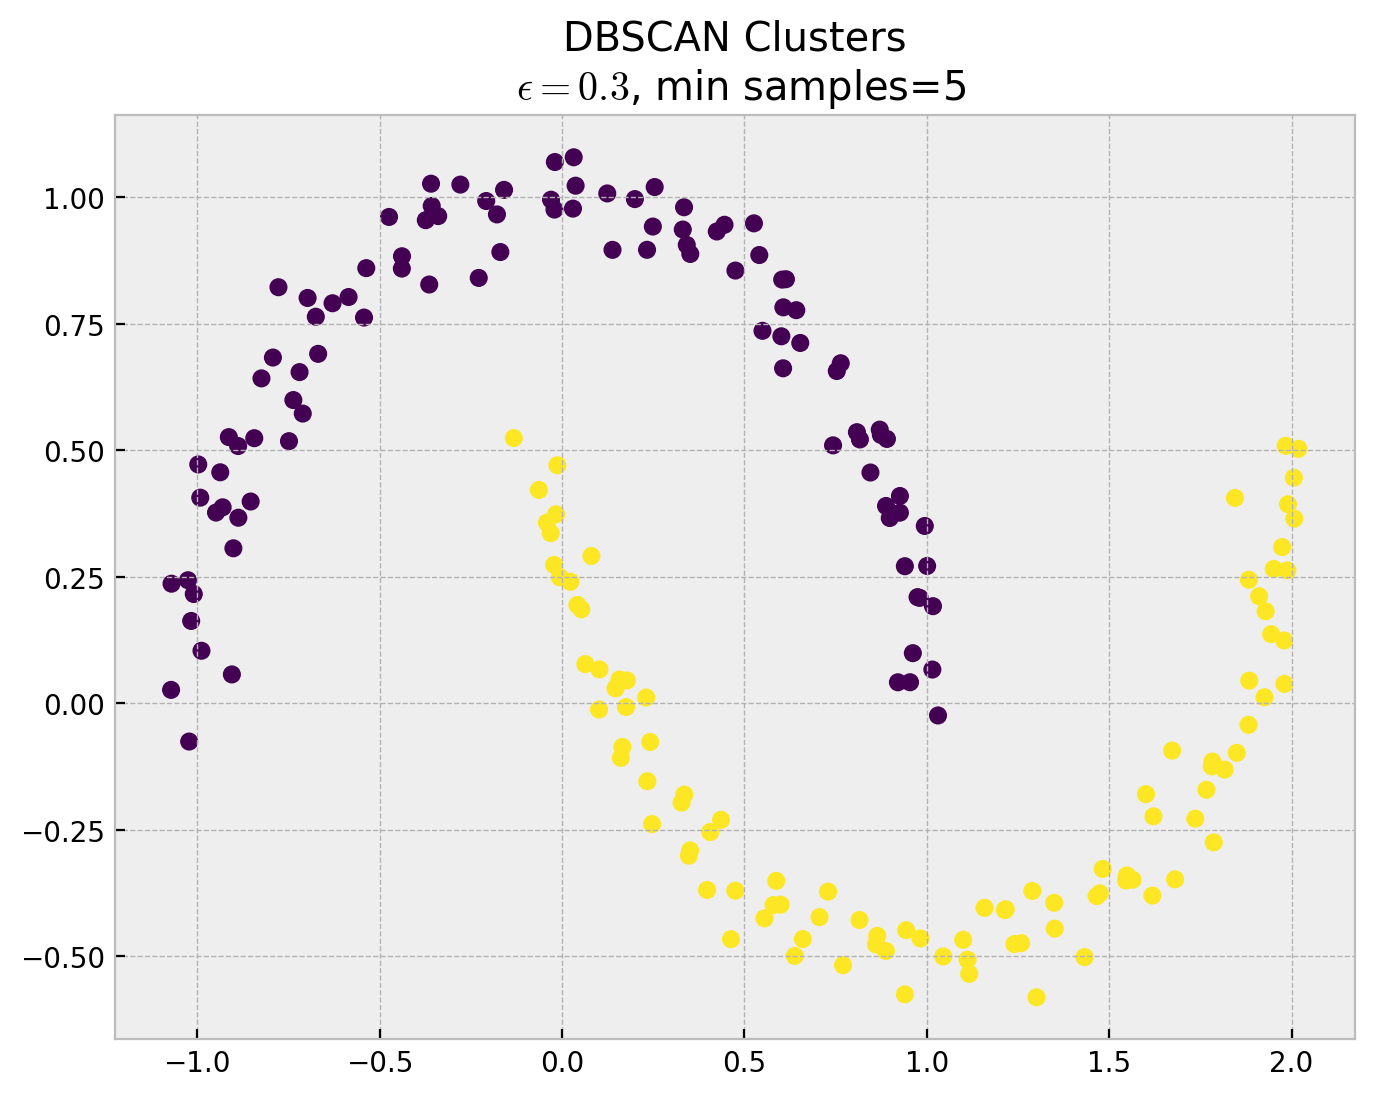

In [45]:
plt.scatter(X[:,0], X[:,1], c=labels);
plt.title('DBSCAN Clusters\n $\epsilon=0.3$, min samples=5');

Cluster size (and number of clusters ) depends on $\epsilon$.

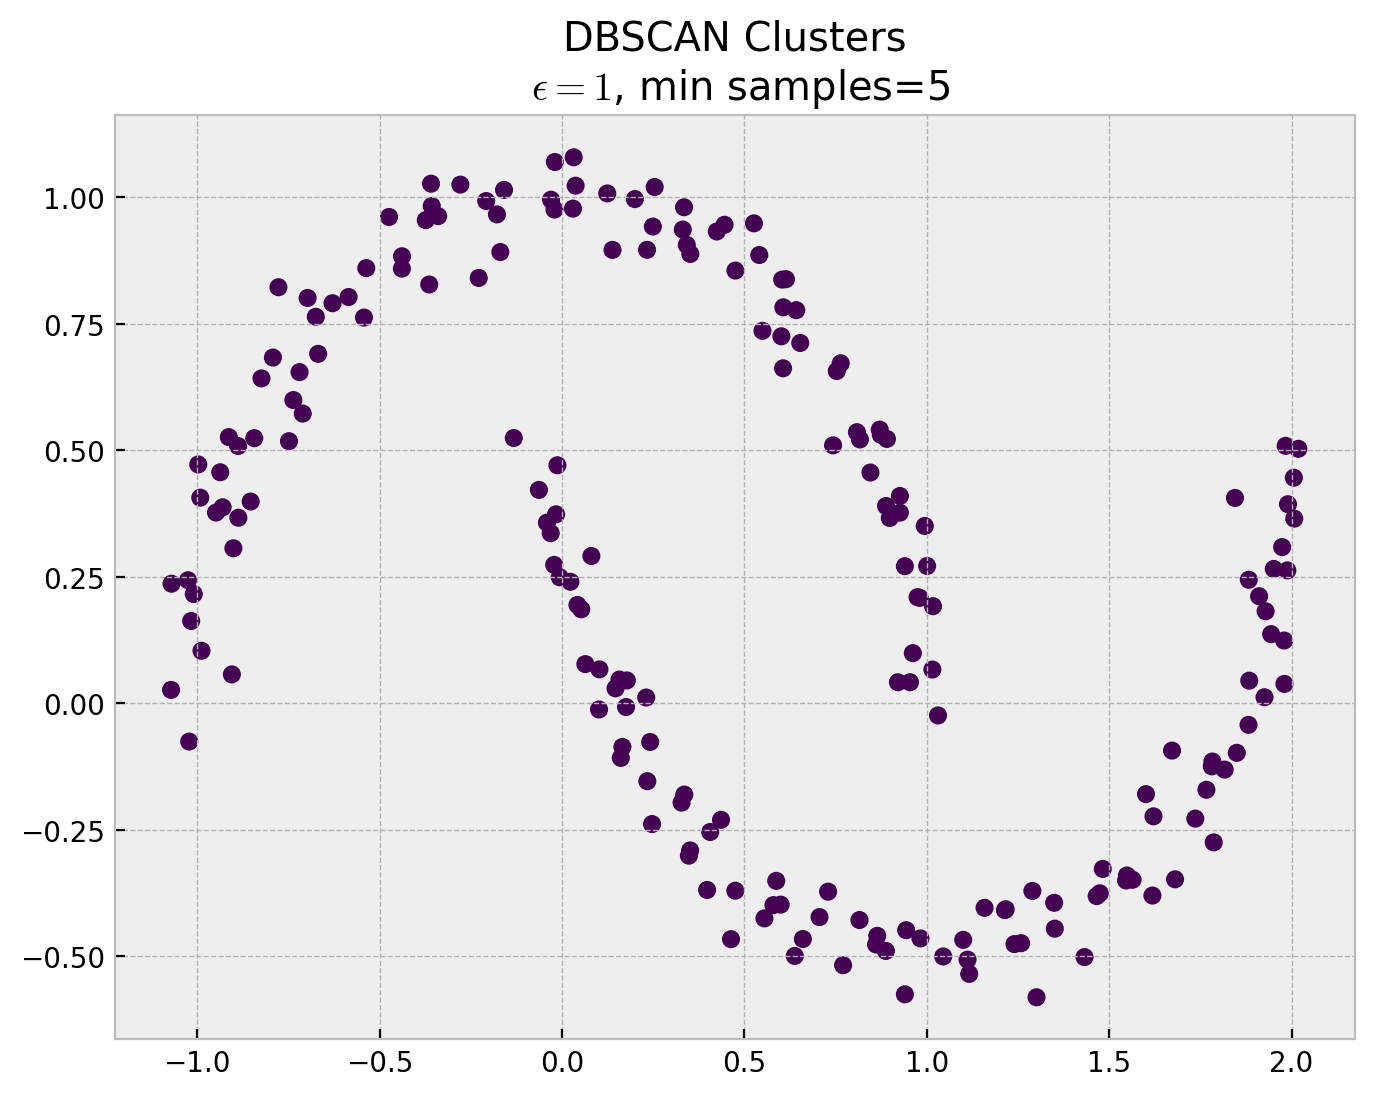

In [46]:
model = DBSCAN(eps=1, min_samples=5)
labels = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels);
plt.title('DBSCAN Clusters\n $\epsilon=1$, min samples=5');

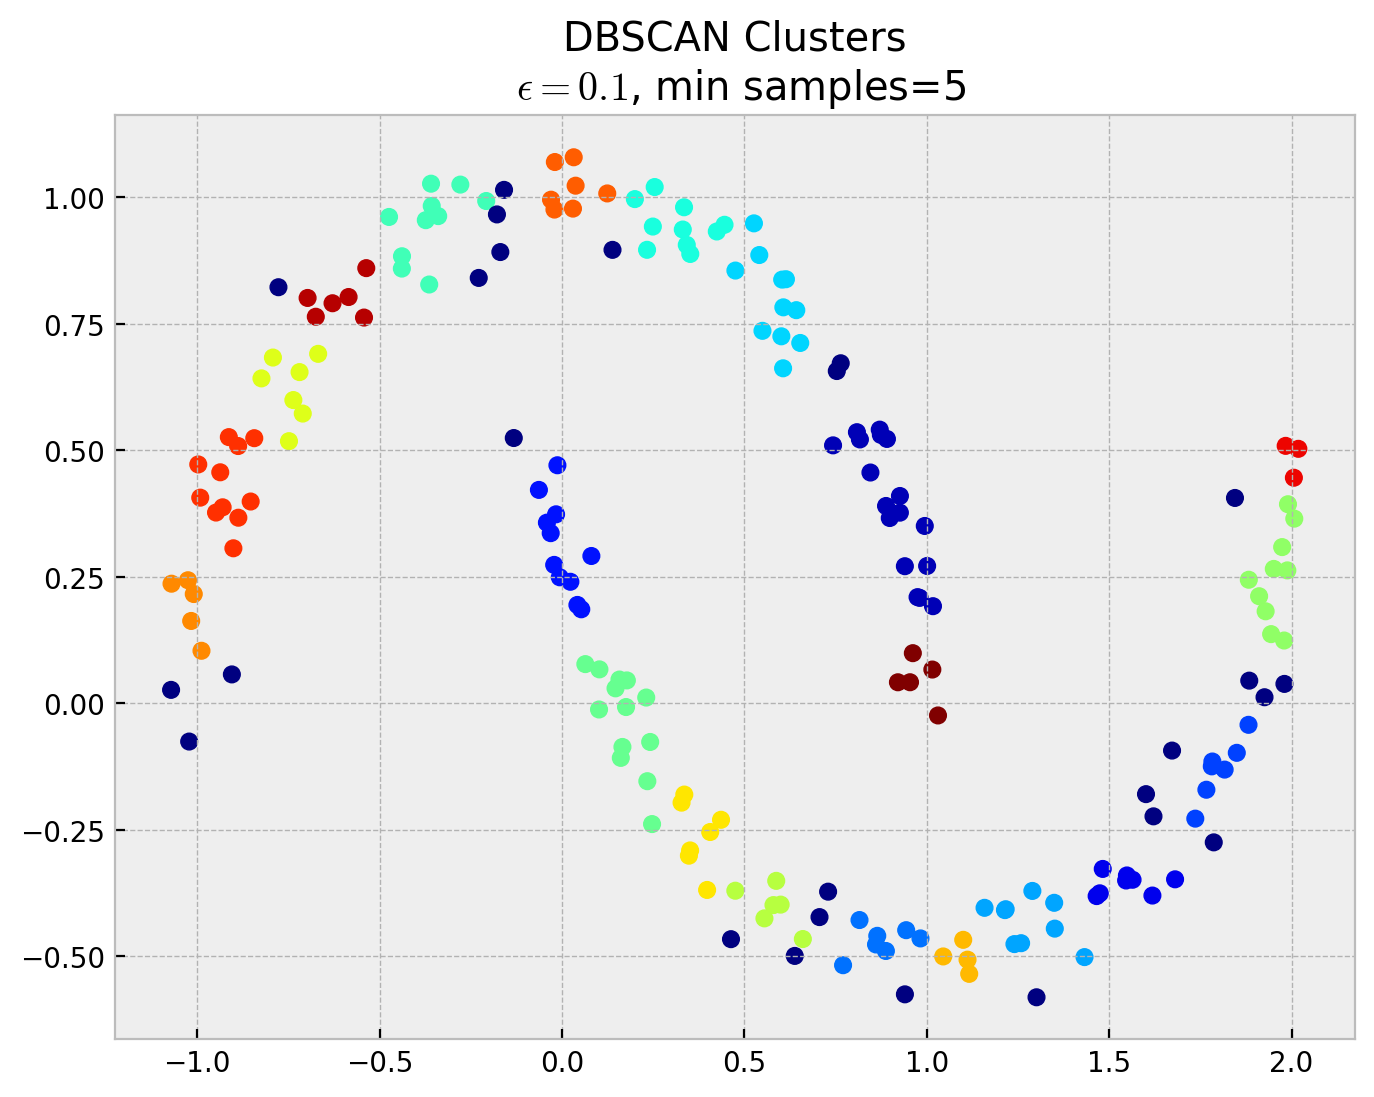

In [47]:
model = DBSCAN(eps=0.1, min_samples=5)
labels = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='jet');
plt.title('DBSCAN Clusters\n $\epsilon=0.1$, min samples=5');

# Exercise

Use DBSCAN with $\epsilon = 0.05$ and a minimum of 10 samples to cluster the AKT_N vs. pPKCAB_N expression levels.

Plot the data colored by the predicted cluster.

In [ ]:
X = df2[['AKT_N', 'pPKCAB_N']]

model = ...
labels = ...

plt.scatter(df2['AKT_N'], df2['pPKCAB_N'], c=labels, cmap='jet')
plt.xlabel('AKT_N')
plt.ylabel('pPKCAB_N')
plt.title('DBSCAN');

# Exercise Key

Use DBSCAN with $\epsilon = 0.05$ and a minimum of 10 samples to cluster the AKT_N vs. pPKCAB_N expression levels.

Plot the data colored by the predicted cluster.

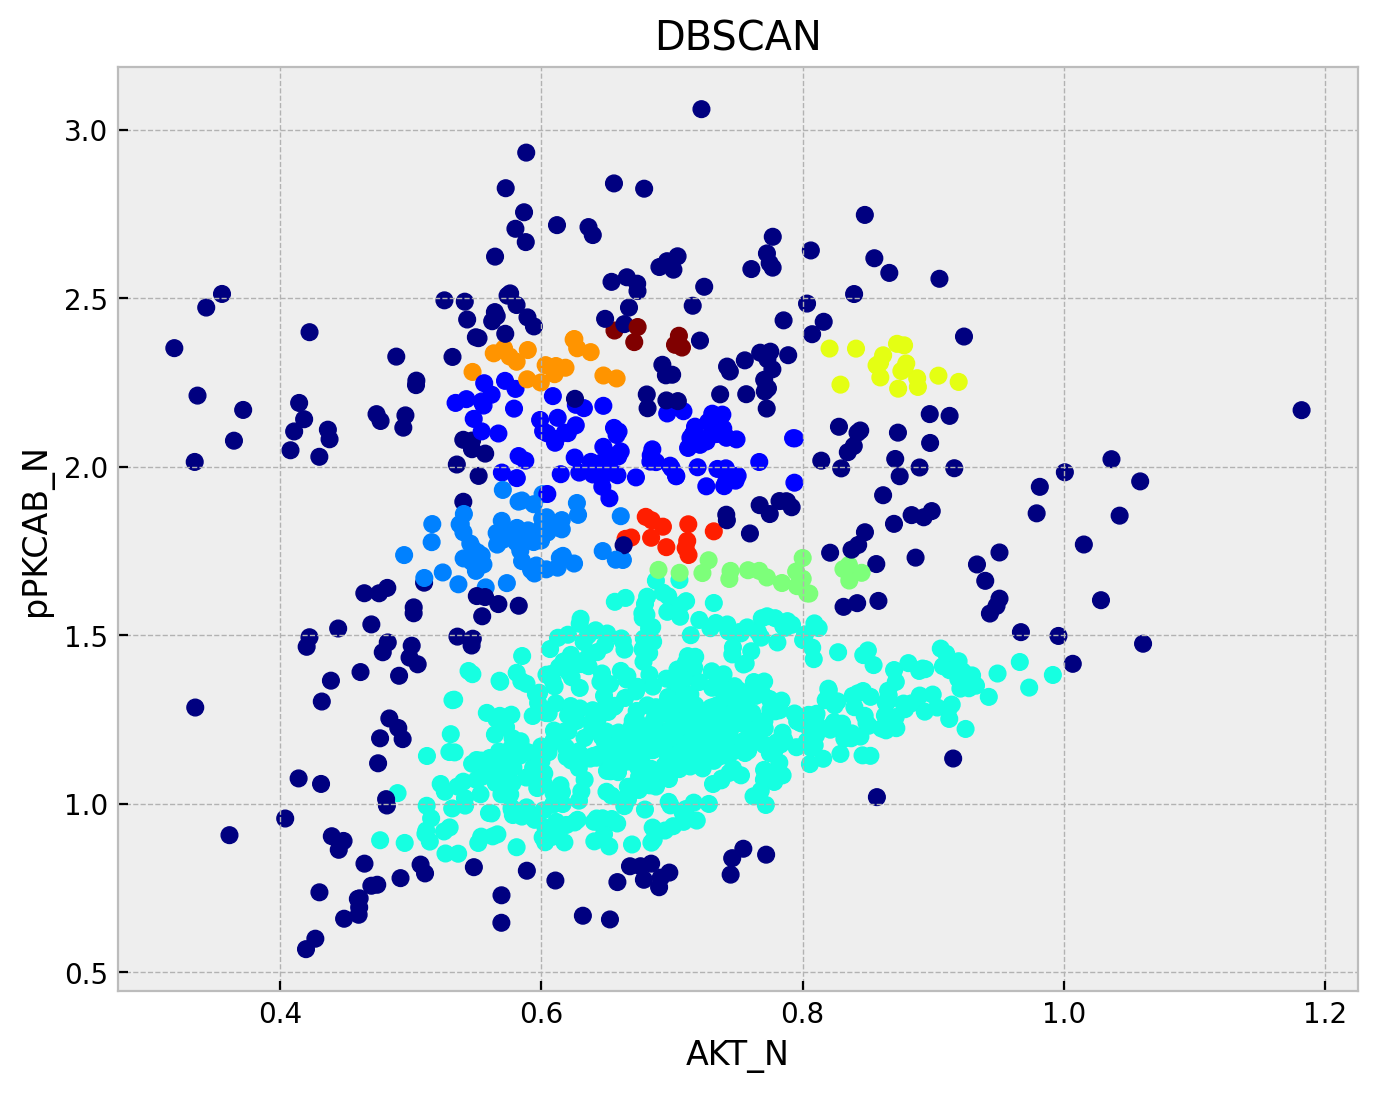

In [49]:
X = df2[['AKT_N', 'pPKCAB_N']]

model = DBSCAN(eps=0.05, min_samples=10)
labels = model.fit_predict(X)

plt.scatter(df2['AKT_N'], df2['pPKCAB_N'], c=labels, cmap='jet')
plt.xlabel('AKT_N')
plt.ylabel('pPKCAB_N')
plt.title('DBSCAN');

### Learning goals - *Clustering*

|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will appreciate that each clustering algorithm has its own pros and cons.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand and be able to use several different clustering algorithms to segregate data.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use several different empirical metrics to tune your model hyperparameters.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use the empirical Bayesian Information Criterion to decide the optimal number of clusters for a Gaussian Mixture Model.</div> |  |